# Problem Statement:
In India, many people hesitate to pursue entrepreneurship due to the fear of startup failure and the perception that traditional jobs are "safer." However, analyzing startup data can give insights into what drives success or failure — such as sector trends, funding patterns, founder background, investor preferences, city ecosystem, and survival rates.

Problem Statement:
"To analyze Indian startup ecosystem data to understand patterns in funding, founder background, sectors, and other factors that influence startup success or failure. The goal is to provide insights that can help entrepreneurs, investors, and policymakers make better decisions."

# import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data 

In [3]:
df=pd.read_csv(r"C:\Users\GHANWAT\Startap EDA intenship task\startup_funding_enriched.csv")  # load data

In [5]:
df

,Date,Startup_Name,Sector,City,Funding_Type,Funding_Amount,Education_Background,Age_Group,Professional_Background,Gender_Mix,Initial_Investment,Burn_Rate,Revenue_Model,Customer_Type,City_Tier,Competition_Level,No_of_CoFounders,Status,Survival_Duration_Years
0,09/01/2020,BYJU’S,E-Tech,Bengaluru,Private Equity Round,"20,00,00,000",IIM,30-39,Engineer,Male-Dominated,3.18,Low,Mixed,Mixed,Tier 3,Low,4,Acquired,10
1,13/01/2020,Shuttl,Transportation,Gurgaon,Series C,"80,48,394",Stanford,20-29,Engineer,Female-Dominated,4.73,Medium,Mixed,Mixed,Tier 3,Medium,4,Acquired,11
2,09/01/2020,Mamaearth,E-commerce,Bengaluru,Series B,"1,83,58,860",IIM,30-39,Corporate,Male-Dominated,4.67,Medium,B2C,B2C,Tier 3,Low,4,Failed,1
3,02/01/2020,https://www.wealthbucket.in/,FinTech,New Delhi,Pre-series A,"30,00,000",Dropout,20-29,Teacher,Male-Dominated,1.23,High,B2C,B2C,Tier 3,Medium,4,Unicorn,9
4,02/01/2020,Fashor,Fashion and Apparel,Mumbai,Seed Round,"18,00,000",Arts,30-39,Engineer,Male-Dominated,3.77,High,B2C,B2C,Tier 1,Medium,3,Failed,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3039,29/01/2015,Printvenue,NaN,NaN,Private Equity,"45,00,000",IIM,20-29,Corporate,Male-Dominated,1.76,Low,B2C,B2C,Tier 3,High,4,Failed,15
3040,29/01/2015,Graphene,NaN,NaN,Private Equity,"8,25,000",Dropout,20-29,Consultant,Mixed,4.62,Medium,B2C,B2C,Tier 3,High,2,Failed,1
3041,30/01/2015,Mad Street Den,NaN,NaN,Private Equity,"15,00,000",IIM,30-39,Entrepreneur,Male-Dominated,4.85,High,B2B,B2B,Tier 3,Medium,4,Acquired,9
3042,30/01/2015,Simplotel,NaN,NaN,Private Equity,NaN,Harvard,40-49,Engineer,Mixed,4.63,Low,B2C,B2C,Tier 3,Medium,2,Unicorn,7


# data cleaning 

In [8]:
df.shape # 3044 row and 19 columns

(3044, 19)

In [10]:
df.columns

Index(['Date', 'Startup_Name', 'Sector', 'City', 'Funding_Type',
       'Funding_Amount', 'Education_Background', 'Age_Group',
       'Professional_Background', 'Gender_Mix', 'Initial_Investment',
       'Burn_Rate', 'Revenue_Model', 'Customer_Type', 'City_Tier',
       'Competition_Level', 'No_of_CoFounders', 'Status',
       'Survival_Duration_Years'],
      dtype='object')

In [927]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     3044 non-null   object 
 1   Startup_Name             3044 non-null   object 
 2   Sector                   2873 non-null   object 
 3   City                     2864 non-null   object 
 4   Funding_Type             3040 non-null   object 
 5   Funding_Amount           2084 non-null   object 
 6   Education_Background     3044 non-null   object 
 7   Age_Group                3044 non-null   object 
 8   Professional_Background  3044 non-null   object 
 9   Gender_Mix               3044 non-null   object 
 10  Initial_Investment       3044 non-null   float64
 11  Burn_Rate                3044 non-null   object 
 12  Revenue_Model            3044 non-null   object 
 13  Customer_Type            3044 non-null   object 
 14  City_Tier               

In [931]:
df.duplicated().sum  # NO DUPLICATES

np.int64(0)

In [929]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Extract year
df['Year'] = df['Date'].dt.year

# Calculate survival years
current_year = pd.Timestamp.now().year
df['Survival_Years'] = current_year - df['Year']

# Convert into int 
df['Survival_Years'] = df['Survival_Years'].fillna(0).astype(int)


### replacing null value

In [934]:
df.isnull().sum()

Date                         8
Startup_Name                 0
Sector                     171
City                       180
Funding_Type                 4
Funding_Amount             960
Education_Background         0
Age_Group                    0
Professional_Background      0
Gender_Mix                   0
Initial_Investment           0
Burn_Rate                    0
Revenue_Model                0
Customer_Type                0
City_Tier                    0
Competition_Level            0
No_of_CoFounders             0
Status                       0
Survival_Duration_Years      0
Year                         8
Survival_Years               0
dtype: int64

In [936]:
df["Sector"] = df["Sector"].fillna("Unknown")
df["City"] = df["City"].fillna("Unknown")


in this data so many null value and category values we can not fill randomly in ths dataset so replace with Unknown
and numerical column we ca replace with mean or median but in our data funding amount is null so there is no funding for that data set so i conver it into zero

In [939]:
df

,Date,Startup_Name,Sector,City,Funding_Type,Funding_Amount,Education_Background,Age_Group,Professional_Background,Gender_Mix,...,Burn_Rate,Revenue_Model,Customer_Type,City_Tier,Competition_Level,No_of_CoFounders,Status,Survival_Duration_Years,Year,Survival_Years
0,2020-01-09,BYJU’S,E-Tech,Bengaluru,Private Equity Round,"20,00,00,000",IIM,30-39,Engineer,Male-Dominated,...,Low,Mixed,Mixed,Tier 3,Low,4,Acquired,10,2020.0,5
1,2020-01-13,Shuttl,Transportation,Gurgaon,Series C,"80,48,394",Stanford,20-29,Engineer,Female-Dominated,...,Medium,Mixed,Mixed,Tier 3,Medium,4,Acquired,11,2020.0,5
2,2020-01-09,Mamaearth,E-commerce,Bengaluru,Series B,"1,83,58,860",IIM,30-39,Corporate,Male-Dominated,...,Medium,B2C,B2C,Tier 3,Low,4,Failed,1,2020.0,5
3,2020-01-02,https://www.wealthbucket.in/,FinTech,New Delhi,Pre-series A,"30,00,000",Dropout,20-29,Teacher,Male-Dominated,...,High,B2C,B2C,Tier 3,Medium,4,Unicorn,9,2020.0,5
4,2020-01-02,Fashor,Fashion and Apparel,Mumbai,Seed Round,"18,00,000",Arts,30-39,Engineer,Male-Dominated,...,High,B2C,B2C,Tier 1,Medium,3,Failed,4,2020.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3039,2015-01-29,Printvenue,Unknown,Unknown,Private Equity,"45,00,000",IIM,20-29,Corporate,Male-Dominated,...,Low,B2C,B2C,Tier 3,High,4,Failed,15,2015.0,10
3040,2015-01-29,Graphene,Unknown,Unknown,Private Equity,"8,25,000",Dropout,20-29,Consultant,Mixed,...,Medium,B2C,B2C,Tier 3,High,2,Failed,1,2015.0,10
3041,2015-01-30,Mad Street Den,Unknown,Unknown,Private Equity,"15,00,000",IIM,30-39,Entrepreneur,Male-Dominated,...,High,B2B,B2B,Tier 3,Medium,4,Acquired,9,2015.0,10
3042,2015-01-30,Simplotel,Unknown,Unknown,Private Equity,NaN,Harvard,40-49,Engineer,Mixed,...,Low,B2C,B2C,Tier 3,Medium,2,Unicorn,7,2015.0,10


In [941]:
# Remove commas or non-numeric characters, then convert to float
df["Funding_Amount"] = (
    df["Funding_Amount"]
    .astype(str)                        
    .str.replace(",", "")            
    .str.replace("₹", "")             
    .str.replace(r"[^\d.]", "", regex=True) 
)

# Convert to numeric
df["Funding_Amount"] = pd.to_numeric(df["Funding_Amount"], errors="coerce")
df

,Date,Startup_Name,Sector,City,Funding_Type,Funding_Amount,Education_Background,Age_Group,Professional_Background,Gender_Mix,...,Burn_Rate,Revenue_Model,Customer_Type,City_Tier,Competition_Level,No_of_CoFounders,Status,Survival_Duration_Years,Year,Survival_Years
0,2020-01-09,BYJU’S,E-Tech,Bengaluru,Private Equity Round,200000000.0,IIM,30-39,Engineer,Male-Dominated,...,Low,Mixed,Mixed,Tier 3,Low,4,Acquired,10,2020.0,5
1,2020-01-13,Shuttl,Transportation,Gurgaon,Series C,8048394.0,Stanford,20-29,Engineer,Female-Dominated,...,Medium,Mixed,Mixed,Tier 3,Medium,4,Acquired,11,2020.0,5
2,2020-01-09,Mamaearth,E-commerce,Bengaluru,Series B,18358860.0,IIM,30-39,Corporate,Male-Dominated,...,Medium,B2C,B2C,Tier 3,Low,4,Failed,1,2020.0,5
3,2020-01-02,https://www.wealthbucket.in/,FinTech,New Delhi,Pre-series A,3000000.0,Dropout,20-29,Teacher,Male-Dominated,...,High,B2C,B2C,Tier 3,Medium,4,Unicorn,9,2020.0,5
4,2020-01-02,Fashor,Fashion and Apparel,Mumbai,Seed Round,1800000.0,Arts,30-39,Engineer,Male-Dominated,...,High,B2C,B2C,Tier 1,Medium,3,Failed,4,2020.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3039,2015-01-29,Printvenue,Unknown,Unknown,Private Equity,4500000.0,IIM,20-29,Corporate,Male-Dominated,...,Low,B2C,B2C,Tier 3,High,4,Failed,15,2015.0,10
3040,2015-01-29,Graphene,Unknown,Unknown,Private Equity,825000.0,Dropout,20-29,Consultant,Mixed,...,Medium,B2C,B2C,Tier 3,High,2,Failed,1,2015.0,10
3041,2015-01-30,Mad Street Den,Unknown,Unknown,Private Equity,1500000.0,IIM,30-39,Entrepreneur,Male-Dominated,...,High,B2B,B2B,Tier 3,Medium,4,Acquired,9,2015.0,10
3042,2015-01-30,Simplotel,Unknown,Unknown,Private Equity,NaN,Harvard,40-49,Engineer,Mixed,...,Low,B2C,B2C,Tier 3,Medium,2,Unicorn,7,2015.0,10


differentiate the messy data and dirty data
dirty data:
1)we want the year (conver the date into year)
2) sector : speling mestec(E-Commerce,E-Commerce )
3)funding type 

In [944]:
def map_broad_category(value):
    val = str(value).lower().strip()

    if "e-commerce" in val or "grocer" in val or "retail" in val:
        return "E-Commerce"

    elif "food" in val or "hospitality" in val or "restaurant" in val or "beverage" in val:
        return "Food & Hospitality"

    elif "health" in val or "wellness" in val or "medical" in val or "fitness" in val:
        return "Healthcare & Wellness"

    elif "tech" in val or "it" in val or "saas" in val or "consumer internet" in val or "platform" in val:
        return "Technology"

    elif "finance" in val or "bank" in val or "loan" in val or "insurance" in val or "fund" in val or "nbfc" in val:
        return "Finance"

    elif "electronic" in val or "mobile" in val or "computer" in val or "appliance" in val:
        return "Electronics"

    elif "auto" in val or "car" in val or "vehicle" in val or "scooter" in val or "bike" in val:
        return "Automobile"

    elif "jewel" in val or "ornament" in val or "gold" in val or "diamond" in val:
        return "Jewelry"

    elif "logistics" in val or "transport" in val or "delivery" in val or "supply chain" in val or "commute" in val or "booking" in val:
        return "Logistics & Travel"

    elif "farm" in val or "agri" in val:
        return "Agriculture"

    elif "energy" in val or "solar" in val or "power" in val or "clean" in val or "recycle" in val or "waste" in val:
        return "Energy & Environment"

    elif "lifestyle" in val or "fashion" in val or "beauty" in val or "social" in val or "luxury" in val:
        return "Lifestyle & Social"

    elif "media" in val or "marketing" in val or "movie" in val or "video" in val or "entertainment" in val:
        return "Media & Marketing"

    elif "real estate" in val or "rental" in val or "housing" in val or "property" in val:
        return "Real Estate & Rentals"

    elif "b2b" in val or "professional" in val or "consulting" in val or "services" in val:
        return "B2B & Professional Services"

    elif val in ["unknown", "others", "nan"]:
        return "Others / Unknown"

    else:
        return "Others / Misc"

# Create a cleaned column (so original is safe)
df["Sector_Cleaned"] = df["Sector"].fillna("Unknown").apply(map_broad_category)

# Check distribution
print(df["Sector_Cleaned"].value_counts())


Sector_Cleaned
Technology                     1775
Others / Misc                   470
Others / Unknown                177
Healthcare & Wellness           125
Food & Hospitality               99
Logistics & Travel               73
Finance                          68
Electronics                      64
E-Commerce                       62
B2B & Professional Services      35
Lifestyle & Social               25
Automobile                       25
Energy & Environment             15
Real Estate & Rentals            12
Media & Marketing                11
Jewelry                           5
Agriculture                       3
Name: count, dtype: int64


In [946]:
df=df.dropna()

In [948]:
# Function to standardize funding types
def clean_funding_type(ft):
    if pd.isna(ft):
        return "Unknown"
    
    ft = ft.lower().strip()  # lowercase and remove spaces/newlines

    # Seed / Early-stage funding
    if "seed" in ft or "angel" in ft:
        return "Seed / Angel"
    
    # Series funding
    elif "series" in ft or "venture" in ft or "round" in ft or "maiden" in ft:
        return "Series / Venture"
    
    # Private Equity / Corporate
    elif "private" in ft or "equity" in ft or "corporate" in ft or "inhouse" in ft:
        return "Private Equity / Corporate"
    
    # Debt funding
    elif "debt" in ft or "loan" in ft or "preference" in ft or "structured" in ft:
        return "Debt / Loan"
    
    # Crowdfunding
    elif "crowd" in ft:
        return "Crowdfunding"
    
    # Mezzanine
    elif "mezzanine" in ft:
        return "Mezzanine"
    
    else:
        return "Other"

# Apply the function
df['Funding_Type_Clean'] = df['Funding_Type'].apply(clean_funding_type)

# Check the results
print(df['Funding_Type_Clean'].value_counts())


Funding_Type_Clean
Private Equity / Corporate    1078
Seed / Angel                   862
Series / Venture                95
Debt / Loan                     29
Crowdfunding                     2
Mezzanine                        1
Name: count, dtype: int64


C:\Users\GHANWAT\AppData\Local\Temp\ipykernel_5572\2018385044.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Funding_Type_Clean'] = df['Funding_Type'].apply(clean_funding_type)


In [950]:
df["Initial_Investment"]

0       3.18
1       4.73
2       4.67
3       1.23
4       3.77
        ... 
3038    2.77
3039    1.76
3040    4.62
3041    4.85
3043    2.04
Name: Initial_Investment, Length: 2067, dtype: float64

In [952]:
df

,Date,Startup_Name,Sector,City,Funding_Type,Funding_Amount,Education_Background,Age_Group,Professional_Background,Gender_Mix,...,Customer_Type,City_Tier,Competition_Level,No_of_CoFounders,Status,Survival_Duration_Years,Year,Survival_Years,Sector_Cleaned,Funding_Type_Clean
0,2020-01-09,BYJU’S,E-Tech,Bengaluru,Private Equity Round,200000000.0,IIM,30-39,Engineer,Male-Dominated,...,Mixed,Tier 3,Low,4,Acquired,10,2020.0,5,Technology,Series / Venture
1,2020-01-13,Shuttl,Transportation,Gurgaon,Series C,8048394.0,Stanford,20-29,Engineer,Female-Dominated,...,Mixed,Tier 3,Medium,4,Acquired,11,2020.0,5,Logistics & Travel,Series / Venture
2,2020-01-09,Mamaearth,E-commerce,Bengaluru,Series B,18358860.0,IIM,30-39,Corporate,Male-Dominated,...,B2C,Tier 3,Low,4,Failed,1,2020.0,5,E-Commerce,Series / Venture
3,2020-01-02,https://www.wealthbucket.in/,FinTech,New Delhi,Pre-series A,3000000.0,Dropout,20-29,Teacher,Male-Dominated,...,B2C,Tier 3,Medium,4,Unicorn,9,2020.0,5,Technology,Series / Venture
4,2020-01-02,Fashor,Fashion and Apparel,Mumbai,Seed Round,1800000.0,Arts,30-39,Engineer,Male-Dominated,...,B2C,Tier 1,Medium,3,Failed,4,2020.0,5,Lifestyle & Social,Seed / Angel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038,2015-01-28,Grabhouse.com,Unknown,Unknown,Private Equity,2500000.0,MBA,30-39,Consultant,Male-Dominated,...,B2C,Tier 3,High,4,Failed,9,2015.0,10,Others / Unknown,Private Equity / Corporate
3039,2015-01-29,Printvenue,Unknown,Unknown,Private Equity,4500000.0,IIM,20-29,Corporate,Male-Dominated,...,B2C,Tier 3,High,4,Failed,15,2015.0,10,Others / Unknown,Private Equity / Corporate
3040,2015-01-29,Graphene,Unknown,Unknown,Private Equity,825000.0,Dropout,20-29,Consultant,Mixed,...,B2C,Tier 3,High,2,Failed,1,2015.0,10,Others / Unknown,Private Equity / Corporate
3041,2015-01-30,Mad Street Den,Unknown,Unknown,Private Equity,1500000.0,IIM,30-39,Entrepreneur,Male-Dominated,...,B2B,Tier 3,Medium,4,Acquired,9,2015.0,10,Others / Unknown,Private Equity / Corporate


In [954]:
# Convert everything to lowercase and strip spaces
df["City"] = df["City"].str.lower().str.strip()

# Fix common variations and typos
city_clean_dict = {
    "bangalore": "bengaluru",
    "bengaluru": "bengaluru",
    "new delhi": "delhi",
    "delhi": "delhi",
    "gurugram": "gurgaon",
    "gurgaon": "gurgaon",
    "bombay": "mumbai",
    "mumbai": "mumbai",
    "noida": "noida",
    "pune / us": "pune",
    "ahmedabad": "ahmedabad",
    "jaipur": "jaipur",
    "kolkata": "kolkata",
    "indore": "indore",
    "chandigarh": "chandigarh",
    "vadodara": "vadodara",
    "goa": "goa",
    "singapore": "singapore",
    "coimbatore": "coimbatore",
    "kanpur": "kanpur"
}

# Map corrections
df["City"] = df["City"].map(city_clean_dict).fillna(df["City"])


C:\Users\GHANWAT\AppData\Local\Temp\ipykernel_5572\1038882794.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["City"] = df["City"].str.lower().str.strip()
C:\Users\GHANWAT\AppData\Local\Temp\ipykernel_5572\1038882794.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["City"] = df["City"].map(city_clean_dict).fillna(df["City"])


In [956]:
df=df.drop("Sector",axis=1)

# EDA

## Univariate

#### Categorical Data

C:\Users\GHANWAT\AppData\Local\Temp\ipykernel_5572\4285087592.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\GHANWAT\AppData\Local\Temp\ipykernel_5572\4285087592.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


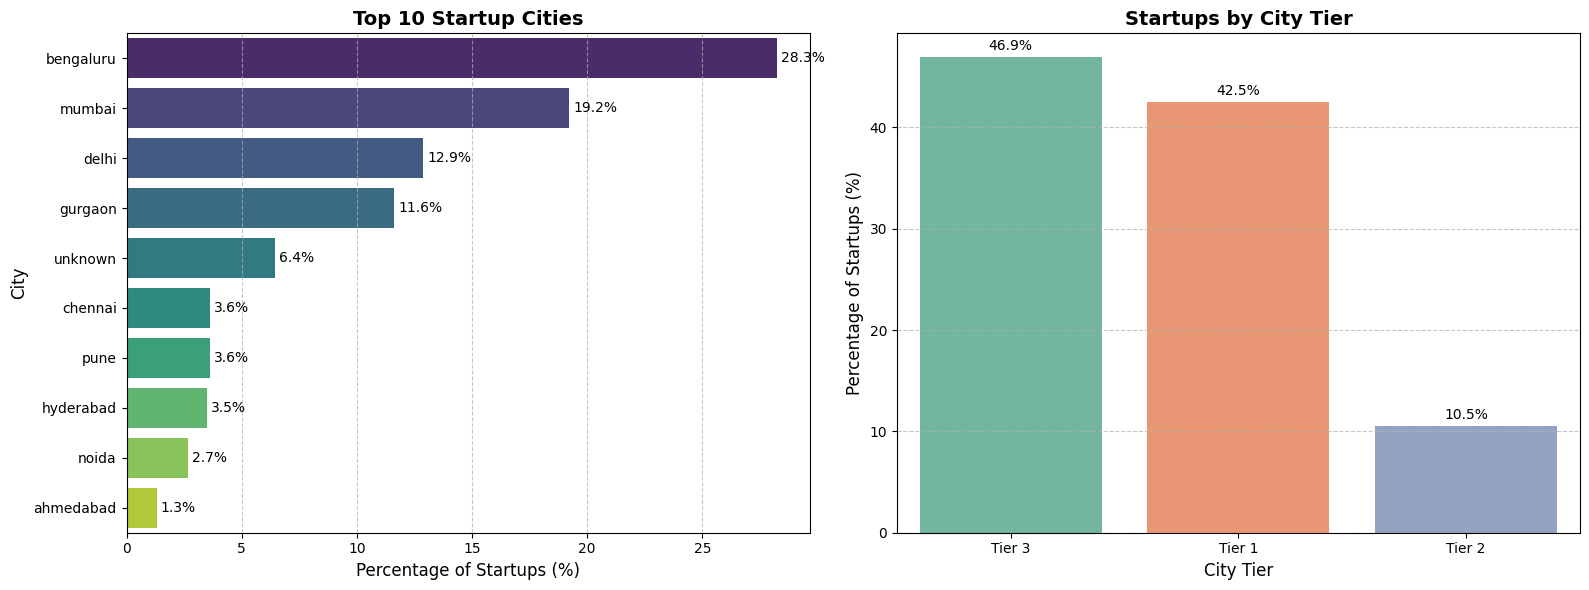

In [1069]:
# Set the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# --- First plot: Top 10 cities by number of startups (horizontal) ---
top_cities = df["City"].value_counts(normalize=True).mul(100).head(10)  # % values
sns.barplot(
    x=top_cities.values,
    y=top_cities.index,
    palette="viridis",
    ax=axes[0]
)
axes[0].set_title("Top 10 Startup Cities", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Percentage of Startups (%)", fontsize=12)
axes[0].set_ylabel("City", fontsize=12)
axes[0].grid(axis="x", linestyle="--", alpha=0.7)

# Add percentage labels
for container in axes[0].containers:
    axes[0].bar_label(container, fmt="%.1f%%", fontsize=10, padding=3)

# --- Second plot: City Tier distribution (vertical) ---
tier_percent = df["City_Tier"].value_counts(normalize=True).mul(100)  # % values
sns.barplot(
    x=tier_percent.index,
    y=tier_percent.values,
    palette="Set2",
    ax=axes[1]
)
axes[1].set_title("Startups by City Tier", fontsize=14, fontweight="bold")
axes[1].set_xlabel("City Tier", fontsize=12)
axes[1].set_ylabel("Percentage of Startups (%)", fontsize=12)
axes[1].grid(axis="y", linestyle="--", alpha=0.7)

# Add percentage labels
for container in axes[1].containers:
    axes[1].bar_label(container, fmt="%.1f%%", fontsize=10, padding=3)

# Adjust layout and display
plt.tight_layout()
plt.show()


Bengaluru clearly stands out as India’s startup hub with around 28% share, followed by Mumbai (19%) and then Delhi and Gurgaon joining the race. But what’s interesting is that a big chunk of startups are coming from Tier 3 cities. This shows that beyond the big metros, smaller cities are also grabbing attention because of new opportunities, lower costs, and the push for better infrastructure.

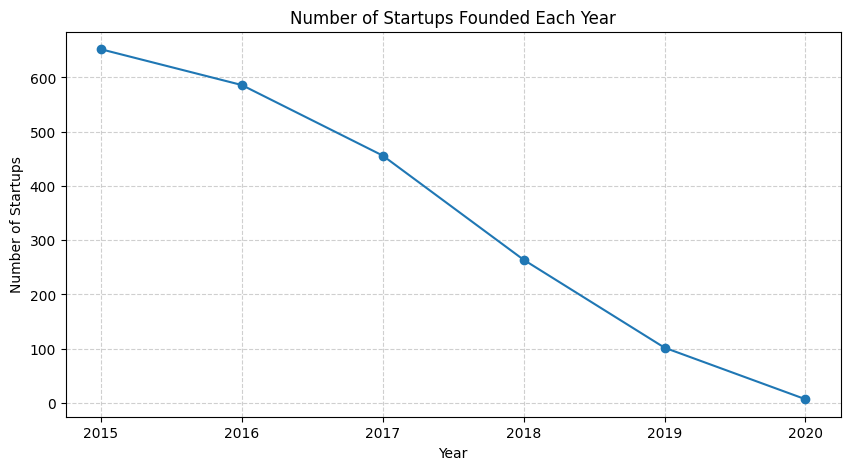

In [962]:
yearly_startups = df["Year"].value_counts().sort_index()

# Line chart
plt.figure(figsize=(10,5))
plt.plot(yearly_startups.index, yearly_startups.values, marker="o", linestyle="-")
plt.title("Number of Startups Founded Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Startups")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


We can see a big spike in startups around 2015–2016, which was the golden phase of India’s startup boom with heavy funding and government push like Startup India. But after that, the graph declines as funding became more selective, competition increased, and many unsustainable startups shut down. This reflects a shift from “hype-driven growth” to “quality and survival.

C:\Users\GHANWAT\AppData\Local\Temp\ipykernel_5572\2990875185.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


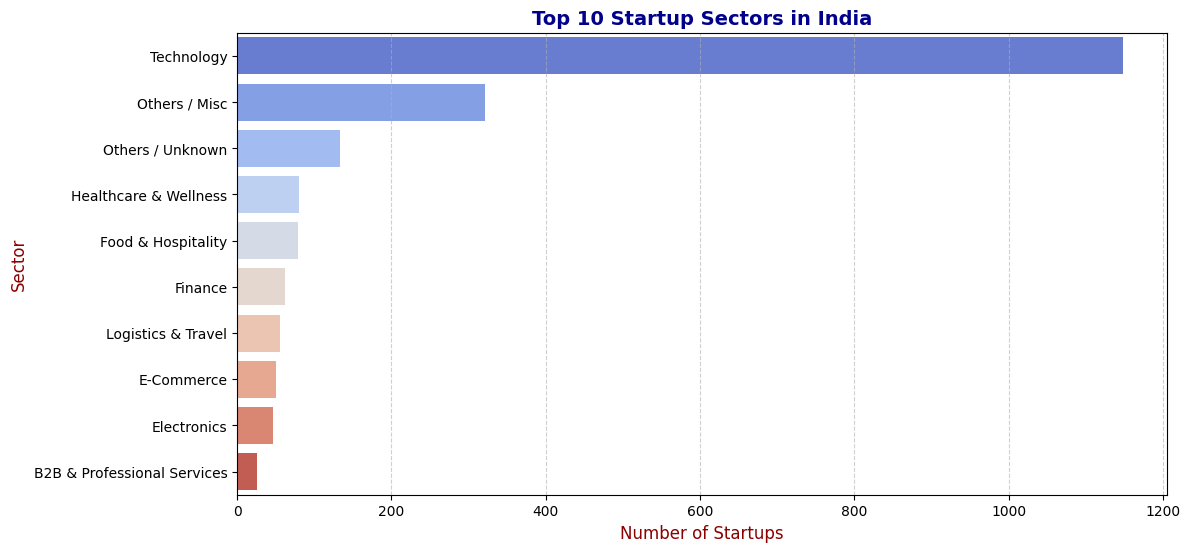

In [1076]:
plt.figure(figsize=(12,6))
sns.countplot(
    data=df,
    y="Sector_Cleaned",
    order=df["Sector_Cleaned"].value_counts().index[:10],
    palette="coolwarm"  # you can try "viridis" or "Set2" too
)

plt.title("Top 10 Startup Sectors in India", fontsize=14, fontweight="bold", color="darkblue")
plt.xlabel("Number of Startups", fontsize=12, color="darkred")
plt.ylabel("Sector", fontsize=12, color="darkred")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()


From the data, it’s clear that Technology dominates all other sectors by a big margin, reflecting the digital wave of the 2020s where everything is shifting online. The second sector is there, but still far behind tech, followed by Miscellaneous, Healthcare, Food, and E-commerce. Tech leads because this era is driven by computers, AI, and digital infrastructure, making it the backbone of modern startups.

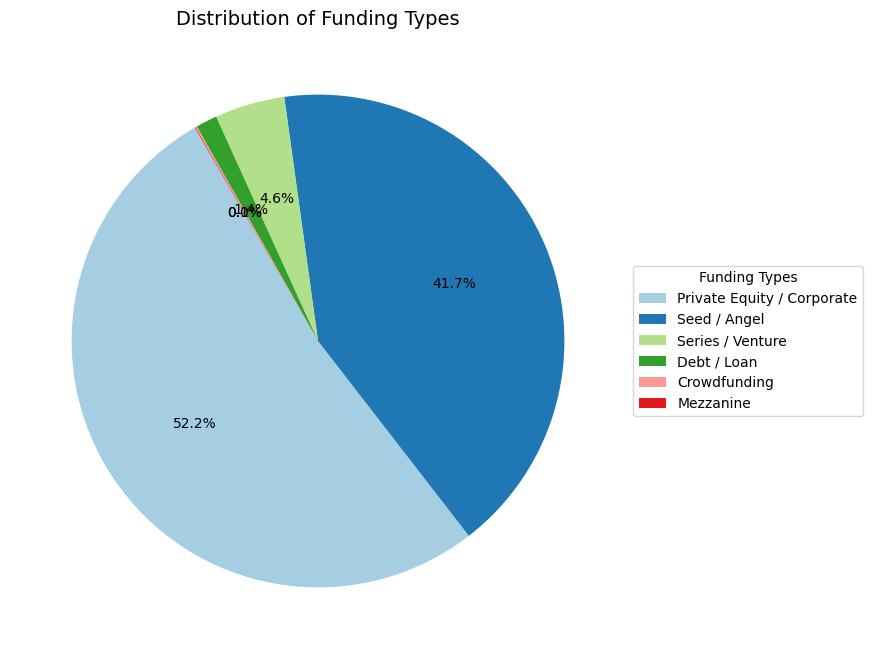

In [964]:
# Pie chart with legend (no overlapping labels)
funding_counts = df["Funding_Type_Clean"].value_counts()

plt.figure(figsize=(8,8))
wedges, texts, autotexts = plt.pie(
    funding_counts,
    autopct="%1.1f%%",
    startangle=120,
    colors=plt.cm.Paired.colors,
    textprops={"fontsize":10}
)

# Add legend outside
plt.legend(
    wedges,
    funding_counts.index,
    title="Funding Types",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.title("Distribution of Funding Types", fontsize=14)
plt.show()


From the chart, we see that Private/Corporate funding dominates with about 52.2%, followed by Seed/Angel funding at 41.7%. Together, these two types cover almost the entire funding landscape. In comparison, Debt/Loan and Mezzanine funding are negligible, showing that Indian startups rely far more on equity-based funding than on debt instruments.

C:\Users\GHANWAT\AppData\Local\Temp\ipykernel_5572\2056819658.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\GHANWAT\AppData\Local\Temp\ipykernel_5572\2056819658.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha="right")
C:\Users\GHANWAT\AppData\Local\Temp\ipykernel_5572\2056819658.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\GHANWAT\AppData\Local\Temp\ipykernel_5572\2056819658.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a Fixed

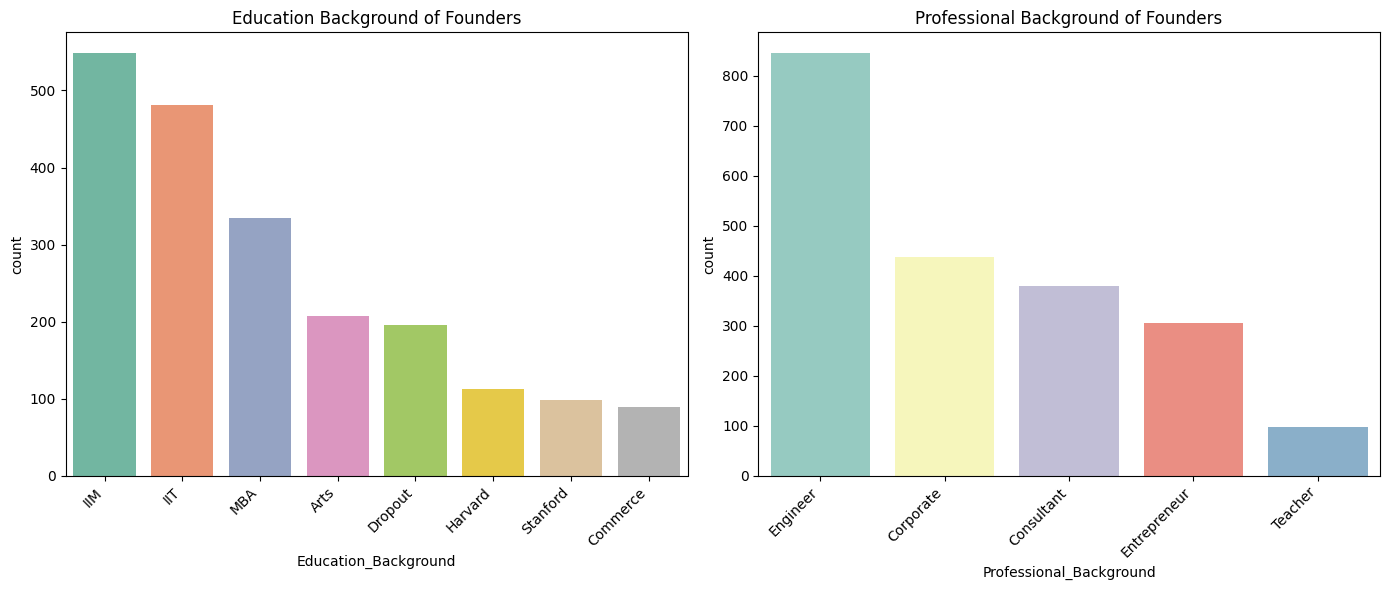

In [1084]:
# Create figure with 2 plots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Education Background
sns.countplot(
    data=df,
    x="Education_Background",
    order=df["Education_Background"].value_counts().index,
    ax=axes[0],
    palette="Set2"
)
axes[0].set_title("Education Background of Founders")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha="right")

# Plot 2: Professional Background (also vertical)
sns.countplot(
    data=df,
    x="Professional_Background",
    order=df["Professional_Background"].value_counts().index,
    ax=axes[1],
    palette="Set3"
)
axes[1].set_title("Professional Background of Founders")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()


When we look at education background, most founders come from IIMs and IITs, showing that India’s top institutes remain a strong base for entrepreneurship. Interestingly, there are also dropout founders, proving that formal degrees are not the only path to building startups.

On the professional background side, the majority of founders are engineers and corporate professionals, which is expected given their technical and managerial exposure. What stands out is that even teachers and academics are stepping in as founders, showing that startup ideas are no longer limited to just tech or business circles.

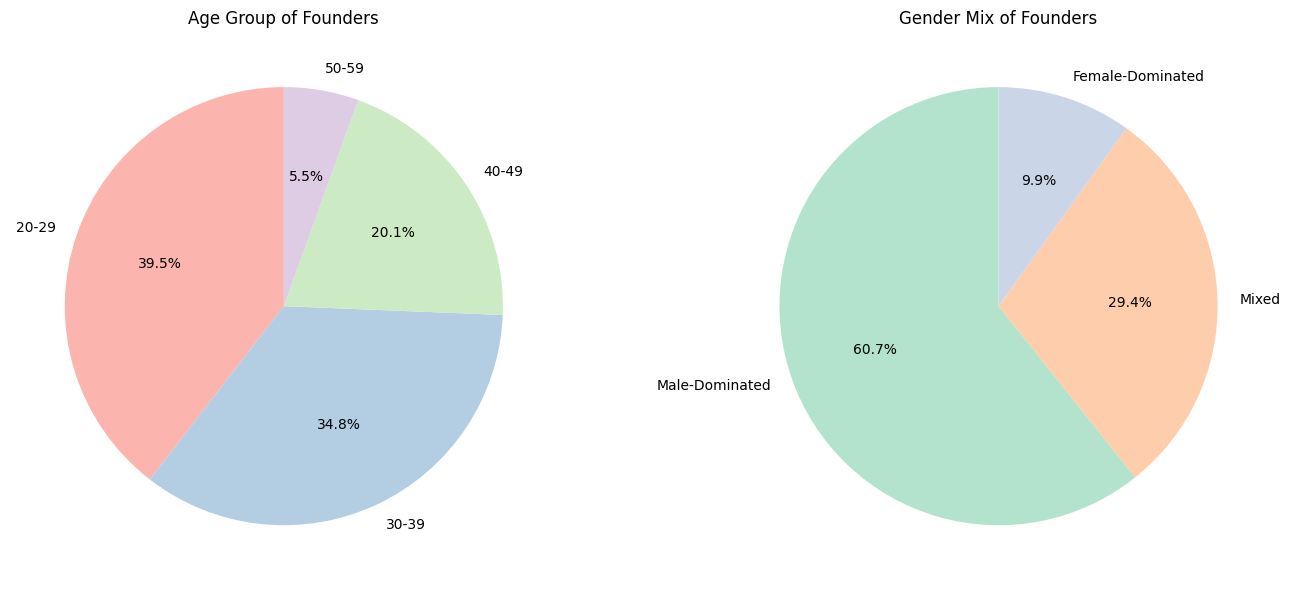

In [966]:
# Create figure with 2 subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart 1: Age Group
df["Age_Group"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=90,
    ax=axes[0],
    colors=plt.cm.Pastel1.colors
)
axes[0].set_title("Age Group of Founders")
axes[0].set_ylabel("")  # remove extra label

# Pie chart 2: Gender Mix
df["Gender_Mix"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=90,
    ax=axes[1],
    colors=plt.cm.Pastel2.colors
)
axes[1].set_title("Gender Mix of Founders")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()


Most founders belong to the 20–29 age group (39.5%), followed closely by 30–39 (34.8%), which shows that India’s startup ecosystem is being driven largely by young and energetic entrepreneurs with fresh ideas. Even in the 50–59 group (5.5%), we see participation, proving that startup ambitions are not limited to youth alone.

On the gender side, men (60.7%) still dominate the landscape, while women founders (9.9%) are underrepresented. However, the mixed-gender founder teams (29.4%) are a positive sign, reflecting growing inclusivity and collaboration in India’s startup ecosystem.

C:\Users\GHANWAT\AppData\Local\Temp\ipykernel_5572\148366576.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\GHANWAT\AppData\Local\Temp\ipykernel_5572\148366576.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha="right")
C:\Users\GHANWAT\AppData\Local\Temp\ipykernel_5572\148366576.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\GHANWAT\AppData\Local\Temp\ipykernel_5572\148366576.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLoca

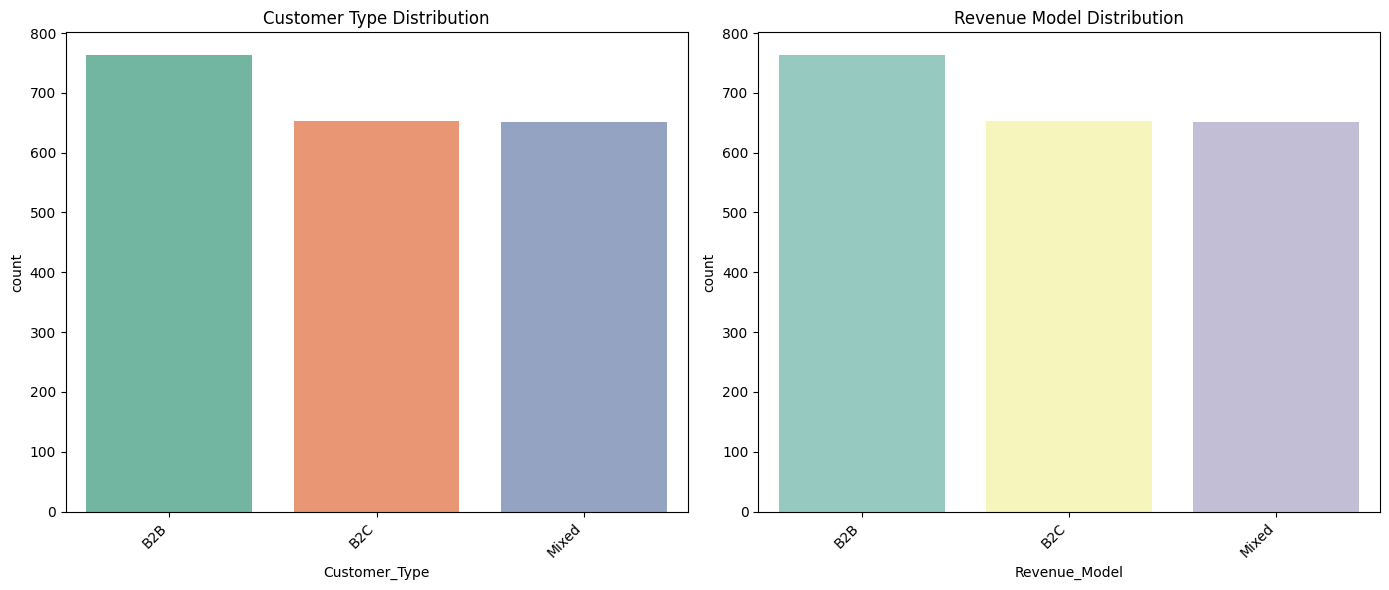

In [970]:
# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Customer Type
sns.countplot(
    data=df,
    x="Customer_Type",
    order=df["Customer_Type"].value_counts().index,
    ax=axes[0],
    palette="Set2"
)
axes[0].set_title("Customer Type Distribution")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha="right")

# Plot 2: Revenue Model
sns.countplot(
    data=df,
    x="Revenue_Model",
    order=df["Revenue_Model"].value_counts().index,
    ax=axes[1],
    palette="Set3"
)
axes[1].set_title("Revenue Model Distribution")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()


From the data, we see that B2B dominates both in customer type and revenue model, making it the most preferred approach among startups. B2C and mixed models are also present but not too far behind, showing that startups are experimenting with multiple approaches. Overall, the trend highlights a strong tilt towards business-focused solutions, while consumer-driven models continue to grow steadily.

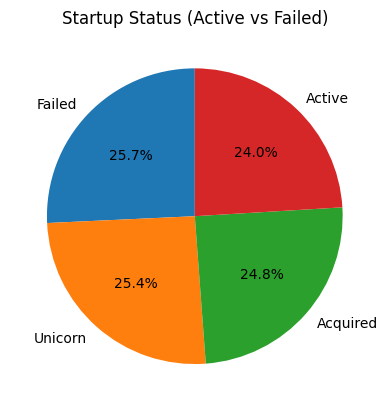

In [974]:
df["Status"].value_counts().plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.title("Startup Status (Active vs Failed)")
plt.ylabel("")
plt.show()


The startup landscape looks quite balanced: about 25.7% have failed, while 24.0% remain active. At the same time, 24.8% have been acquired, and around 25.4% have grown into unicorns. This near-equal split shows that while many startups struggle, an almost equal share either sustain, get acquired, or achieve massive success.

#### Numerical Data

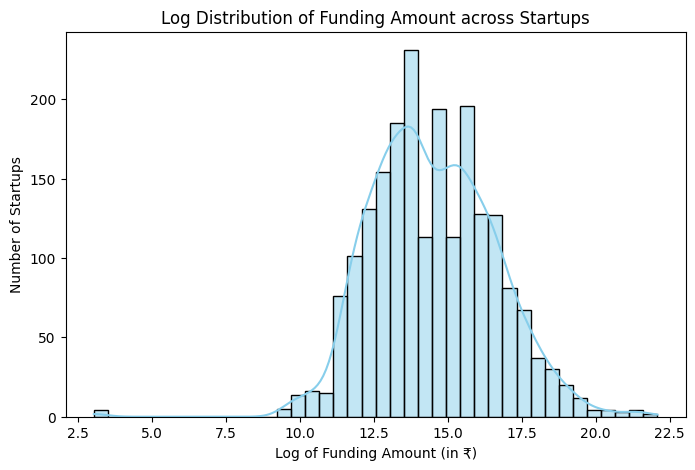

In [986]:
plt.figure(figsize=(8,5))
sns.histplot(np.log1p(df["Funding_Amount"]), bins=40, kde=True, color="skyblue")
plt.title("Log Distribution of Funding Amount across Startups")
plt.xlabel("Log of Funding Amount (in ₹)")
plt.ylabel("Number of Startups")
plt.show()


The log distribution of funding shows a clear bell-shaped curve, meaning most startups raise funding within a middle range, while very few get extremely small or extremely large amounts. This tells us that the majority of funding deals are concentrated around a typical range, with outliers (very high or very low amounts) being rare. By applying the log scale, we can clearly see the true spread of startup funding without the distortion from huge outliers.

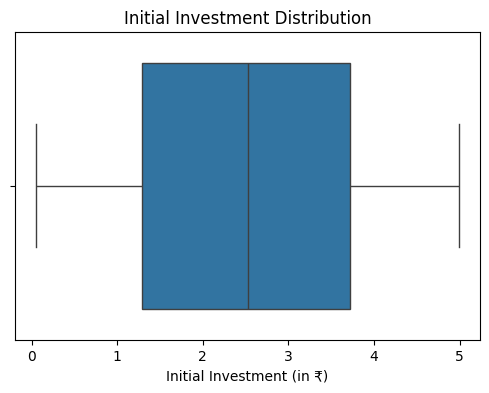

Average Initial Investment: 2.5225495887760037
Median Initial Investment: 2.53


In [988]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Initial_Investment"])
plt.title("Initial Investment Distribution")
plt.xlabel("Initial Investment (in ₹)")
plt.show()

print("Average Initial Investment:", df["Initial_Investment"].mean())
print("Median Initial Investment:", df["Initial_Investment"].median())


The average initial investment is around ₹2.52 crore, and the median is ₹2.53 crore, which means most startups begin with nearly the same level of funding. The boxplot shows that initial investments are fairly balanced without extreme outliers. This suggests that startups generally require a consistent entry-level capital to get started, and the ecosystem has a relatively standard baseline for early funding.

C:\Users\GHANWAT\AppData\Local\Temp\ipykernel_5572\815758241.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survival_Years", data=df, palette="viridis",


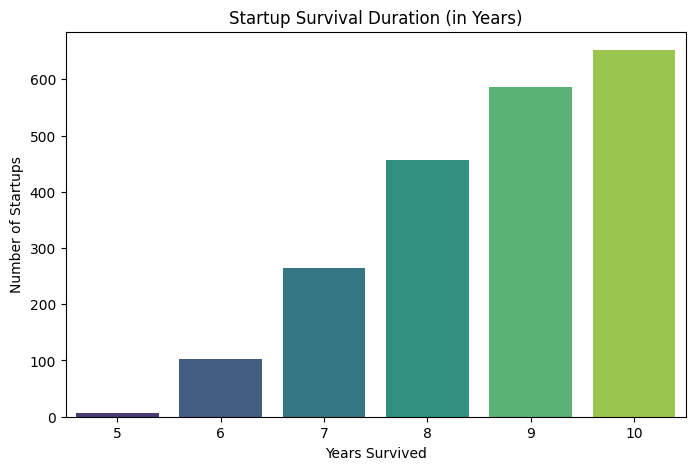

Average Survival Duration: 8.677793904208999
Median Survival Duration: 9.0


In [992]:
plt.figure(figsize=(8,5))
sns.countplot(x="Survival_Years", data=df, palette="viridis",
              order=sorted(df["Survival_Years"].unique()))
plt.title("Startup Survival Duration (in Years)")
plt.xlabel("Years Survived")
plt.ylabel("Number of Startups")
plt.show()

print("Average Survival Duration:", df["Survival_Years"].mean())
print("Median Survival Duration:", df["Survival_Years"].median())


Most startups survive for around 10 years, which is a positive sign for the ecosystem. The average survival duration is close to the median, showing that startups generally have a consistent life span before either scaling, exiting, or shutting down. This indicates that once a startup crosses the early risky phase, it has a good chance of staying active for a decade or more.

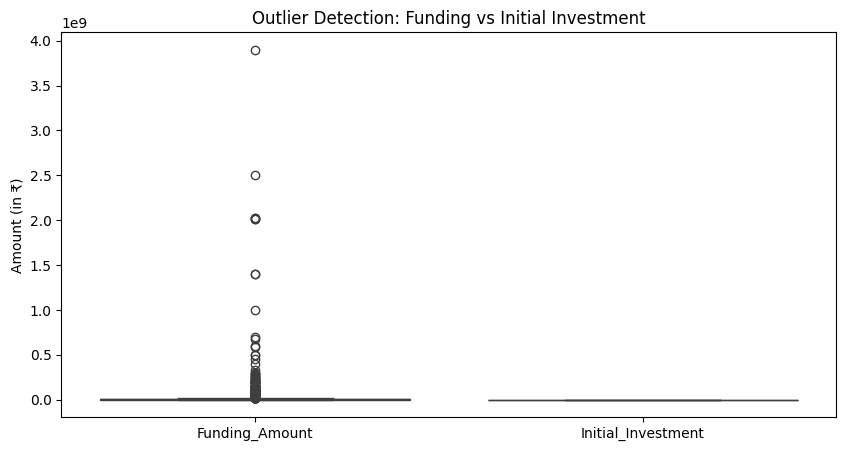

In [994]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[["Funding_Amount", "Initial_Investment"]])
plt.title("Outlier Detection: Funding vs Initial Investment")
plt.ylabel("Amount (in ₹)")
plt.show()


From the boxplot, we can see that both funding amounts and initial investments have several extreme outliers. While most startups receive relatively modest funding, a few have raised very large amounts, pulling the scale upwards. The Funding Amount has far more variation compared to Initial Investment, suggesting that once startups get traction, external funding can skyrocket, even though initial investment usually stays within a smaller, controlled range.

### Bivariate Analysis

#### Categorical vs Numerical

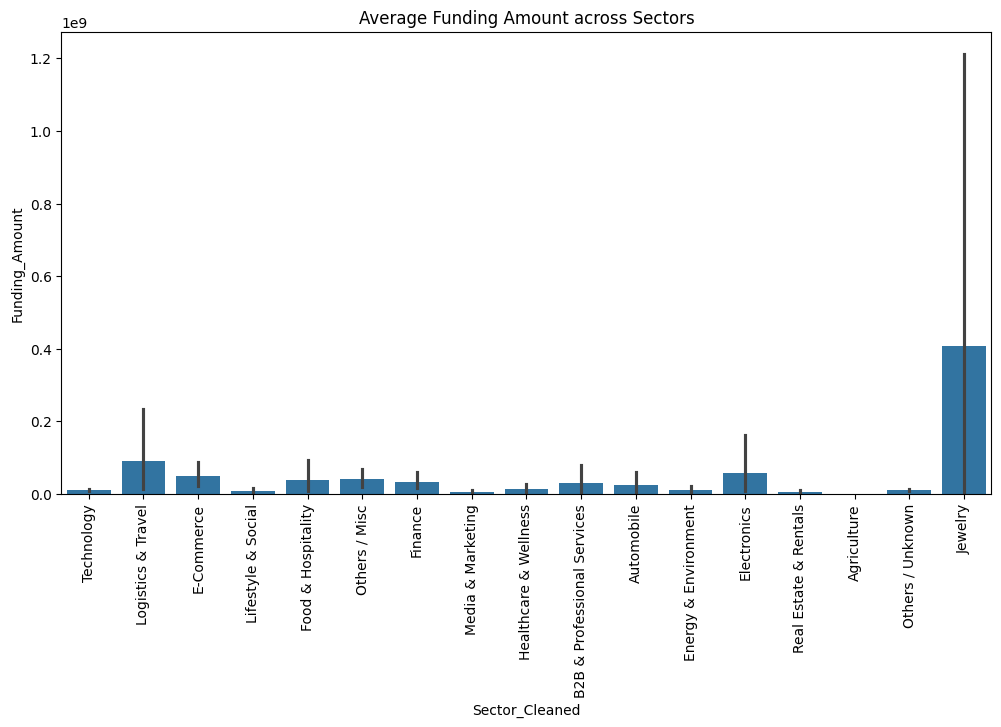

In [1005]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x="Sector_Cleaned", y="Funding_Amount", estimator="mean")
plt.xticks(rotation=90)
plt.title("Average Funding Amount across Sectors")
plt.show()

From the visualization, the Jewellery sector stands out with the highest average funding amount. Interestingly, no other sector comes close to this level — most industries show relatively modest average funding in comparison. This suggests that while funding is spread across multiple domains, Jewellery startups have attracted disproportionately large investments, possibly due to high-value markets or niche investor interest.

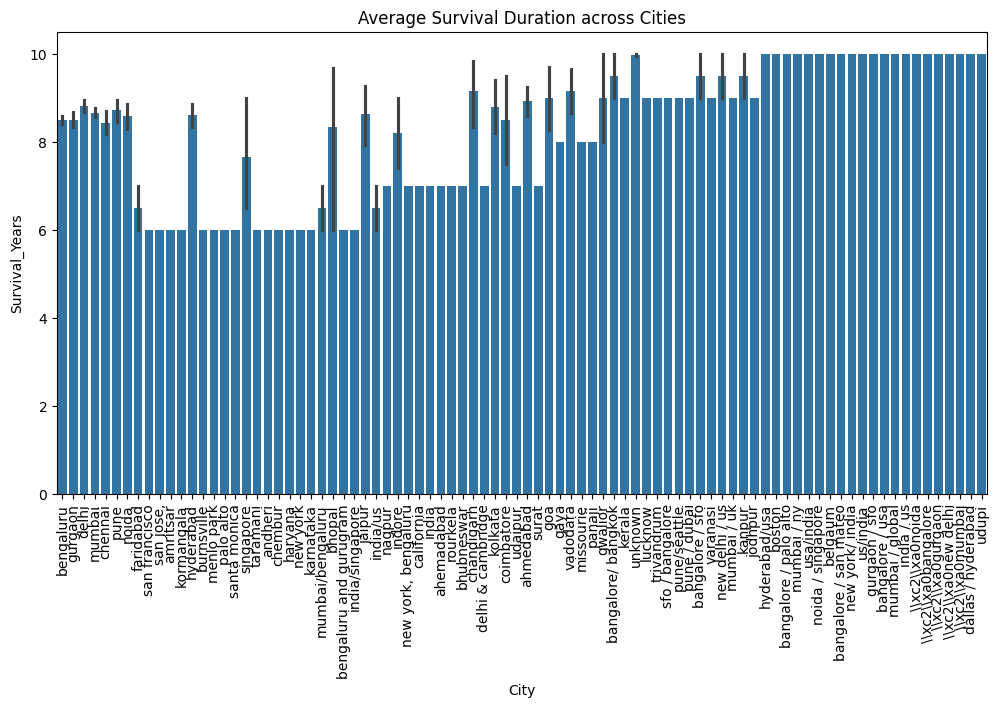

In [1019]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x="City", y="Survival_Years", estimator="mean")
plt.xticks(rotation=90)
plt.title("Average Survival Duration across Cities")
plt.show()

C:\Users\GHANWAT\AppData\Local\Temp\ipykernel_5572\4059628259.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\GHANWAT\AppData\Local\Temp\ipykernel_5572\4059628259.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


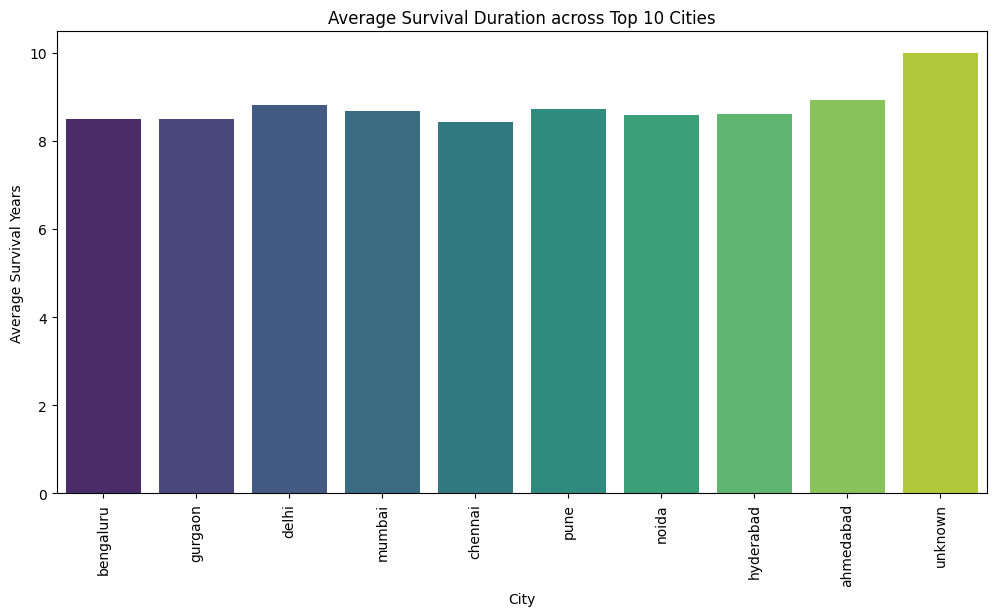

In [1013]:
plt.figure(figsize=(12,6))
top_cities = df["City"].value_counts().index[:10]   # Top 10 cities
sns.barplot(
    data=df[df["City"].isin(top_cities)], 
    x="City", 
    y="Survival_Years", 
    estimator=np.mean, 
    ci=None, 
    palette="viridis"
)
plt.xticks(rotation=90)
plt.title("Average Survival Duration across Top 10 Cities")
plt.xlabel("City")
plt.ylabel("Average Survival Years")
plt.show()


In [ ]:
analysis : 

C:\Users\GHANWAT\AppData\Local\Temp\ipykernel_5572\3833514730.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


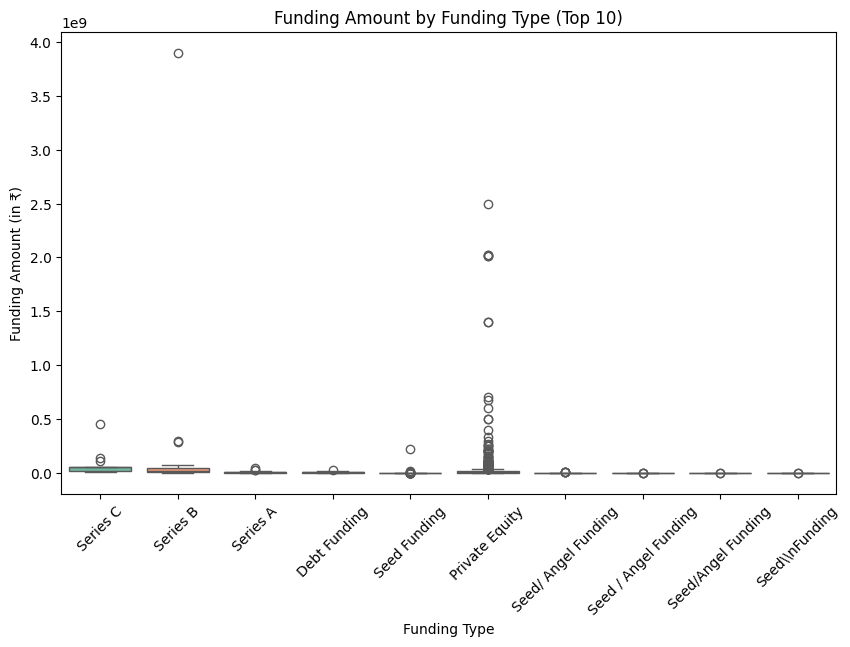

In [1025]:
plt.figure(figsize=(10,6))
top_funding_types = df["Funding_Type"].value_counts().index[:10]   # Top 10 types
sns.boxplot(
    data=df[df["Funding_Type"].isin(top_funding_types)], 
    x="Funding_Type", 
    y="Funding_Amount", 
    palette="Set2"
)
plt.xticks(rotation=45)
plt.title("Funding Amount by Funding Type (Top 10)")
plt.xlabel("Funding Type")
plt.ylabel("Funding Amount (in ₹)")
plt.show()


From the graph, Private Equity clearly dominates with very high funding amounts, even reaching into the billions. Following this, Series C and Series B rounds also show strong funding, while Seed and Angel funding types remain on the lower side.

This pattern highlights that:

Early-stage startups (Seed/Angel) get smaller investments.

Later stages (Series B, Series C, Private Equity) bring in much larger funds as startups scale.

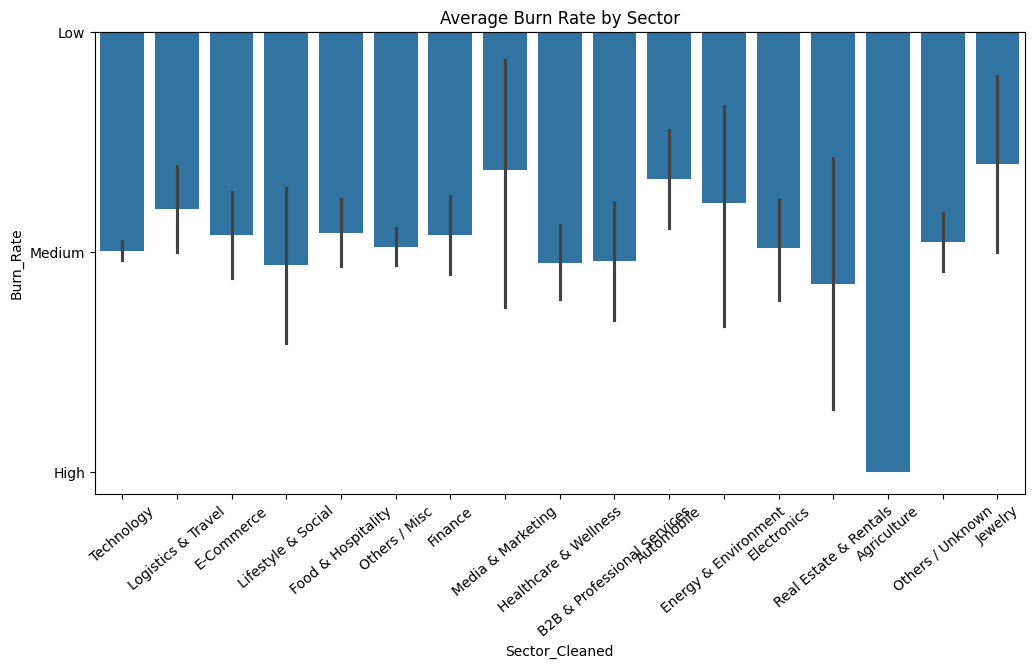

In [1033]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x="Sector_Cleaned", y="Burn_Rate", estimator="mean")
plt.xticks(rotation=40)
plt.title("Average Burn Rate by Sector")
plt.show()

Technology startups keep their burn rate relatively low compared to others — likely due to high scalability and digital-first models.

Agriculture sector shows the highest burn rate, meaning startups in this field spend heavily, maybe due to infrastructure and supply chain costs.

E-commerce, lifestyle, and hospitality sectors have medium burn rates, balancing growth and expenses.

Jewelry and unknown sectors have low to medium burn, but their overall scale seems limited.

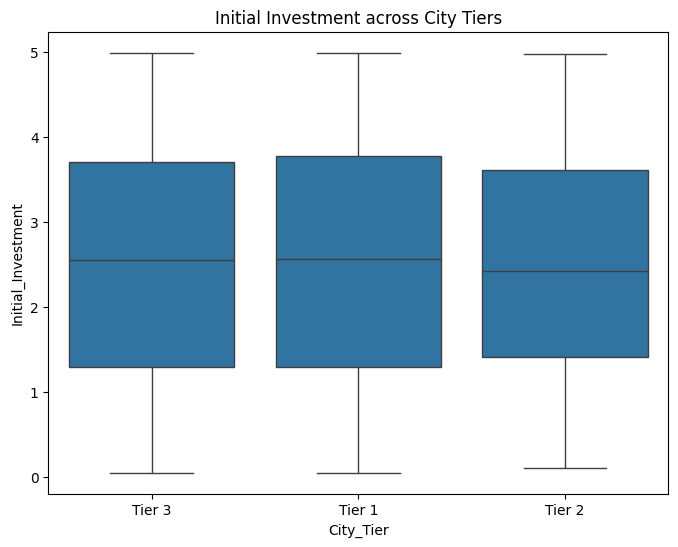

In [1031]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="City_Tier", y="Initial_Investment")
plt.title("Initial Investment across City Tiers")
plt.show()

Startups across Tier 1, Tier 2, and Tier 3 cities showed similar investment patterns, with no extreme highs or lows. The boxplot revealed a balanced story—no city tier stood out with unusual outliers, meaning investments were fairly consistent across all tiers.

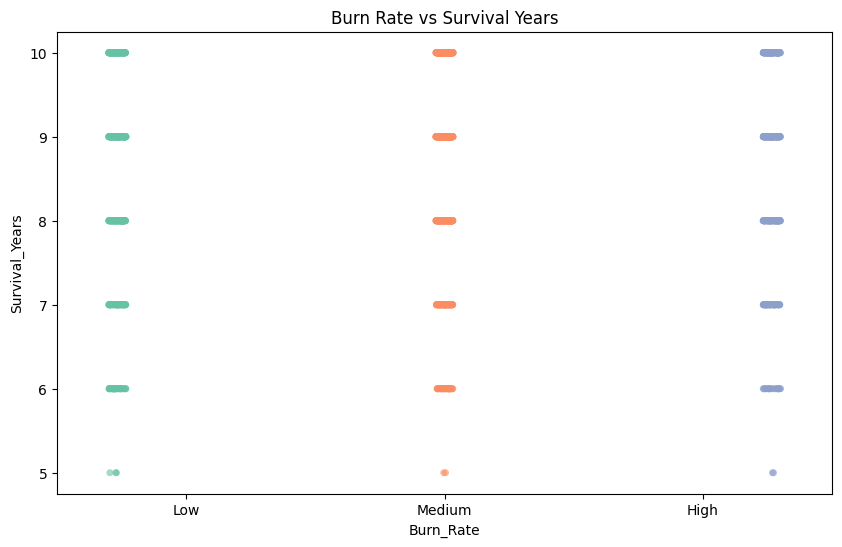

In [1093]:
plt.figure(figsize=(10,6))
sns.stripplot(
    data=df,
    x="Burn_Rate",
    y="Survival_Years",
    hue="Burn_Rate",
    palette="Set2",
    dodge=True,
    jitter=True,
    alpha=0.6,
    legend=False
)
plt.title("Burn Rate vs Survival Years")
plt.show()


Startups with low, medium, or high burn rate all survived for 5 to 10 years. This means burn rate did not make a big difference in how long they lasted.

#### Numerical vs Numerical


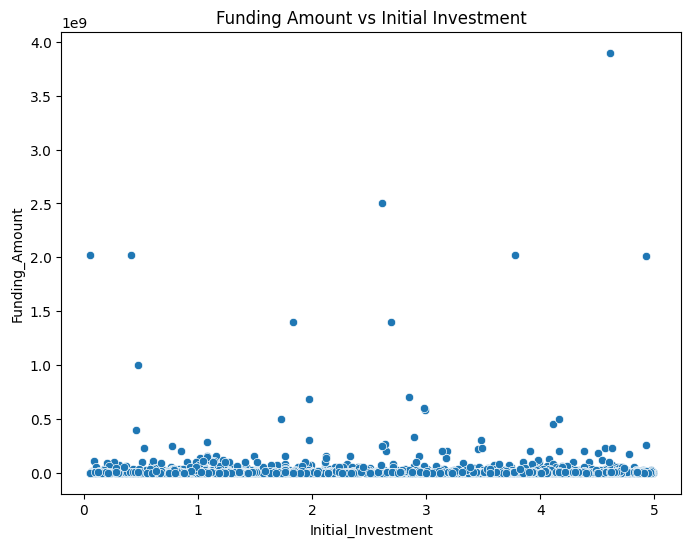

Correlation (Funding vs Initial Investment): 0.0096851078124505


In [1040]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Initial_Investment", y="Funding_Amount")
plt.title("Funding Amount vs Initial Investment")
plt.show()

# Correlation
print("Correlation (Funding vs Initial Investment):", df["Funding_Amount"].corr(df["Initial_Investment"]))


From this chart, it’s clear that the initial investment has almost no impact on the later funding amount. Some startups with very little seed money went on to raise huge funding, while others with high initial investment couldn’t scale.

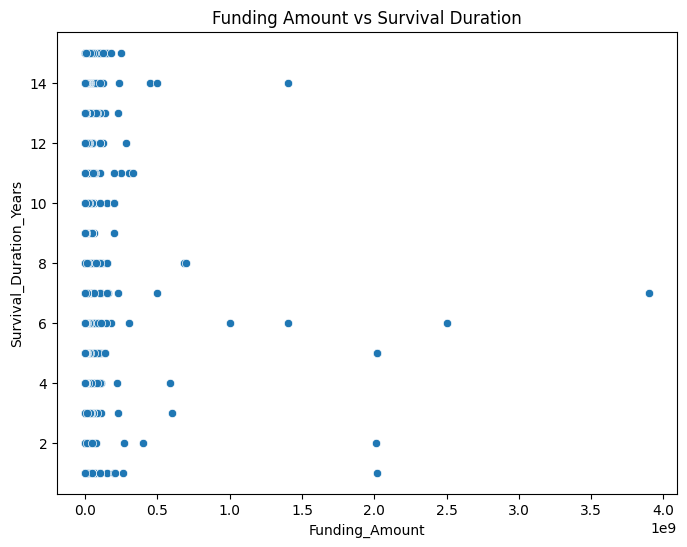

Correlation (Funding vs Survival): -0.03305739350911771


In [1044]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Funding_Amount", y="Survival_Duration_Years")
plt.title("Funding Amount vs Survival Duration")
plt.show()

print("Correlation (Funding vs Survival):", df["Funding_Amount"].corr(df["Survival_Duration_Years"]))

The plot suggests that funding amount does not guarantee startup survival. Some startups raised billions but shut down within a few years, while others with modest funding managed to survive longer.

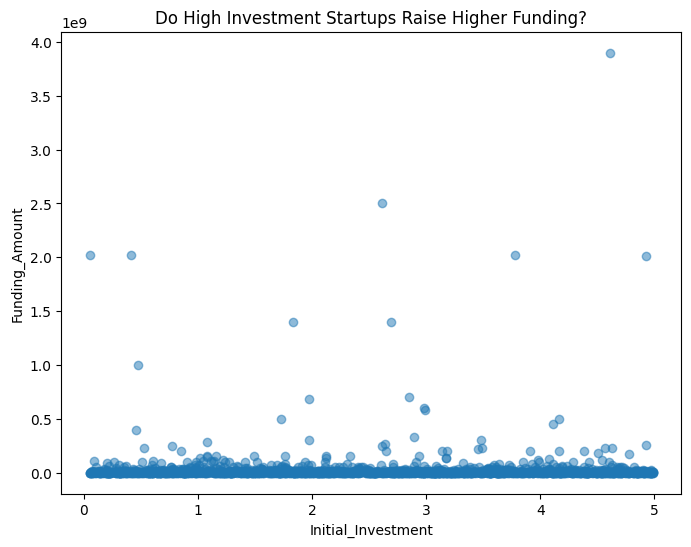

In [1050]:
plt.figure(figsize=(8,6))
sns.regplot(data=df, x="Initial_Investment", y="Funding_Amount", scatter_kws={"alpha":0.5})
plt.title("Do High Investment Startups Raise Higher Funding?")
plt.show()

Startups with high initial investments don’t necessarily raise higher funding. Funding success seems to depend less on how much was invested at the start and more on other factors like innovation, market demand, and execution.

#### Categorical vs Categorical

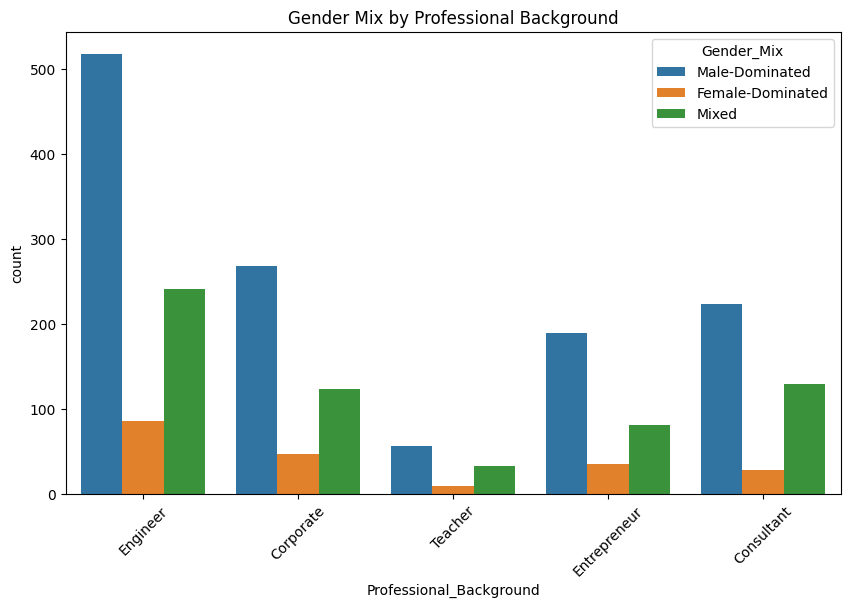

In [1055]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Professional_Background", hue="Gender_Mix")
plt.xticks(rotation=45)
plt.title("Gender Mix by Professional Background")
plt.show()


Startups are mostly led by engineers, with both men and women showing strong participation. Women founders are especially visible in engineering compared to other fields, while in non-engineering domains, men still dominate.

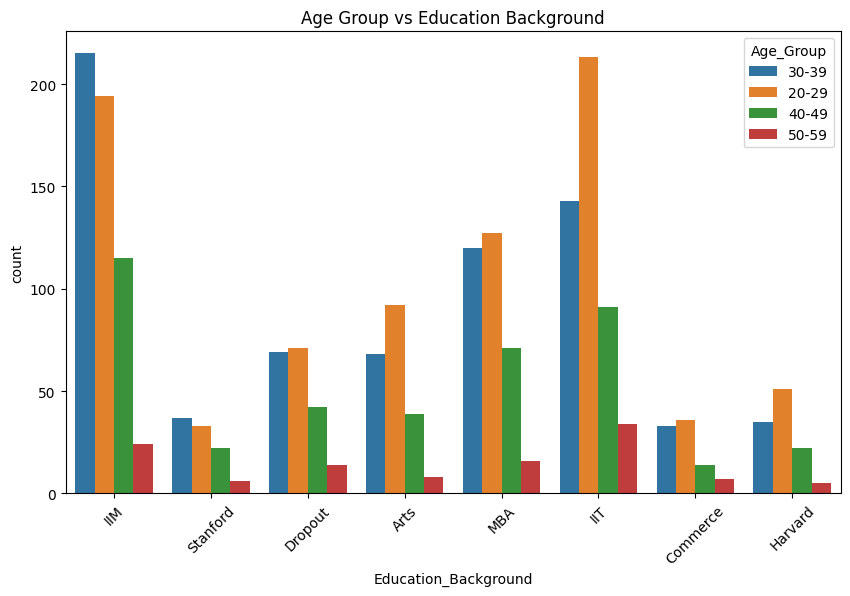

In [1057]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Education_Background", hue="Age_Group")
plt.xticks(rotation=45)
plt.title("Age Group vs Education Background")
plt.show()

Young founders (20–39) with IIT and IIM degrees dominate the startup ecosystem, combining technical and managerial expertise. MBA graduates also play a key role. Interestingly, even dropouts and arts graduates are making their mark, though in smaller numbers. Startups are clearly a young person’s game, as representation drops significantly after 50.

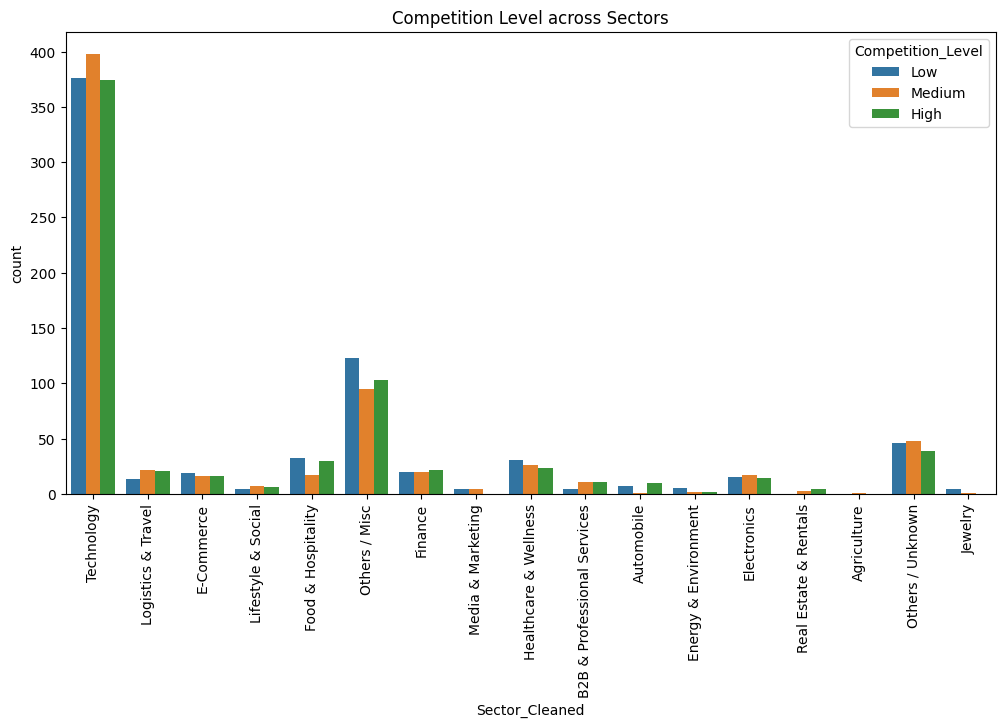

In [1059]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="Sector_Cleaned", hue="Competition_Level")
plt.xticks(rotation=90)
plt.title("Competition Level across Sectors")
plt.show()

Technology dominates the startup ecosystem, with founders entering this space despite high competition. Food & Hospitality and Miscellaneous sectors also attract startups, but at a smaller scale. In niche sectors like Jewelry or Real Estate, competition is minimal as very few startups exist

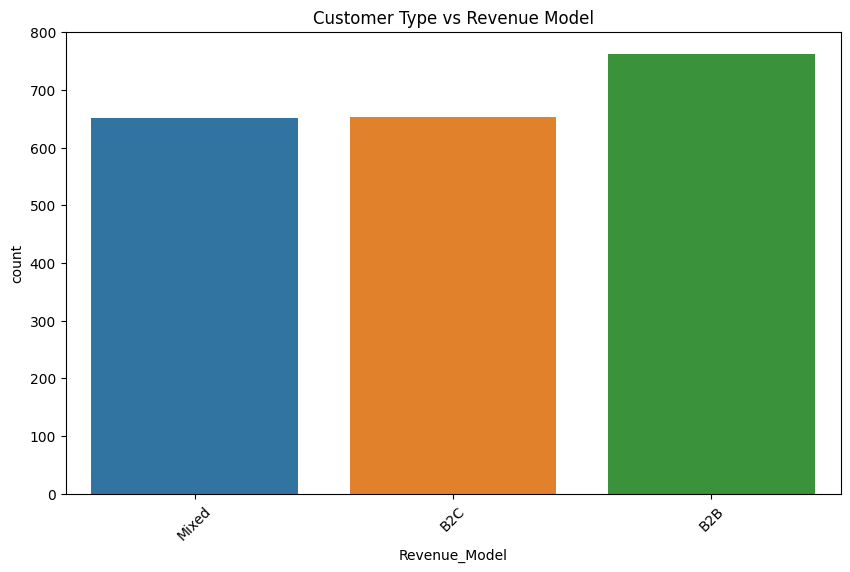

In [1061]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Revenue_Model", hue="Customer_Type")
plt.xticks(rotation=45)
plt.title("Customer Type vs Revenue Model")
plt.show()

Startups lean strongly towards the B2B model, showing how business-driven demand dominates the market. While B2C models continue to thrive, especially in consumer-facing sectors, a significant number of startups adopt a mixed model, balancing both business and consumer customers for growth.

### Multivariate Analysis

C:\Users\GHANWAT\AppData\Local\Temp\ipykernel_5572\1327595922.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Funding_Type_Clean", y="Funding_Amount", inner="quartile", palette="Set2")


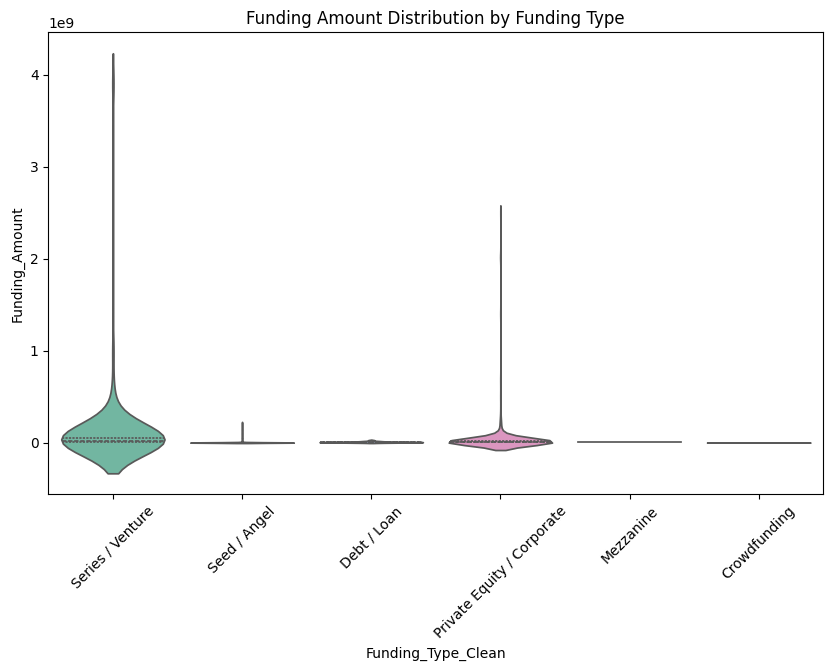

In [1103]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x="Funding_Type_Clean", y="Funding_Amount", inner="quartile", palette="Set2")
plt.title("Funding Amount Distribution by Funding Type")
plt.xticks(rotation=45)
plt.show()


Most funding comes through Series/Venture and Private Equity/Corporate, with very high amounts in some cases. Other types like Seed, Debt, or Crowdfunding usually give much smaller funding.

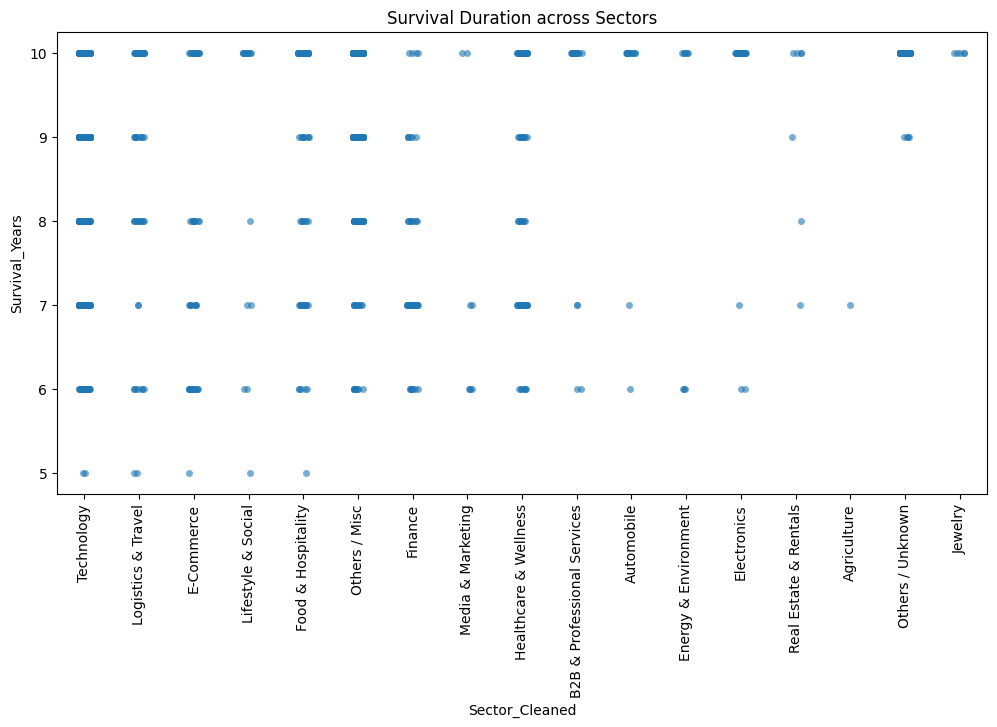

In [1109]:
plt.figure(figsize=(12,6))
sns.stripplot(data=df, x="Sector_Cleaned", y="Survival_Years", jitter=True, alpha=0.6)
plt.title("Survival Duration across Sectors")
plt.xticks(rotation=90)
plt.show()


C:\Users\GHANWAT\AppData\Local\Temp\ipykernel_5572\2494137208.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Education_Background", y="Funding_Amount", palette="Pastel1")


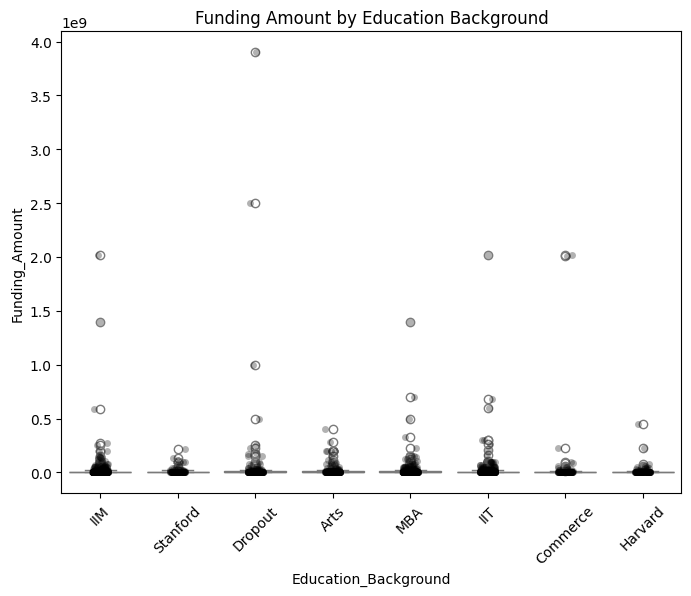

In [1111]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="Education_Background", y="Funding_Amount", palette="Pastel1")
sns.stripplot(data=df, x="Education_Background", y="Funding_Amount", color="black", alpha=0.3)
plt.title("Funding Amount by Education Background")
plt.xticks(rotation=45)
plt.show()


Funding is spread across all education backgrounds, but a few outliers (like from Dropouts, IIT, and Commerce) show very high funding. Overall, education doesn’t strictly decide funding, but exceptional cases exist everywhere.

C:\Users\GHANWAT\AppData\Local\Temp\ipykernel_5572\3209824318.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Age_Group", y="Survival_Duration_Years", palette="muted", inner="quartile")


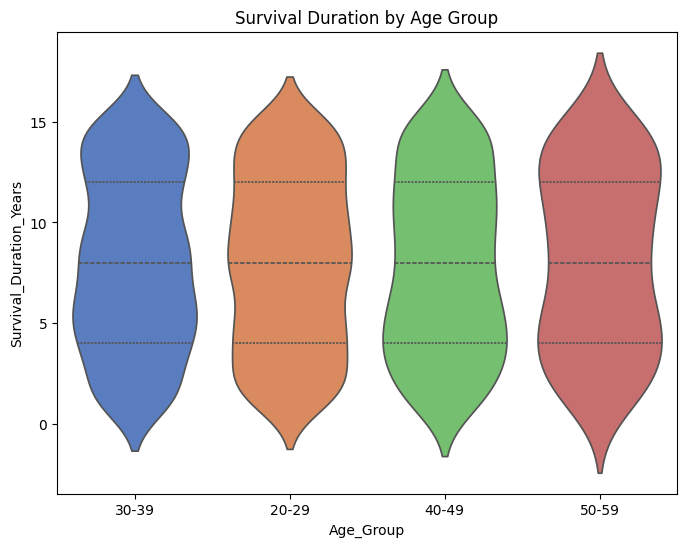

In [1113]:
plt.figure(figsize=(8,6))
sns.violinplot(data=df, x="Age_Group", y="Survival_Duration_Years", palette="muted", inner="quartile")
plt.title("Survival Duration by Age Group")
plt.show()


Across all age groups (20–59), survival duration is quite similar, usually ranging between 2 to 15 years. No single age group has a clear advantage—showing that age doesn’t strongly decide survival chances.

C:\Users\GHANWAT\AppData\Local\Temp\ipykernel_5572\2336718667.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="City_Tier", y="Initial_Investment", palette="Set3")


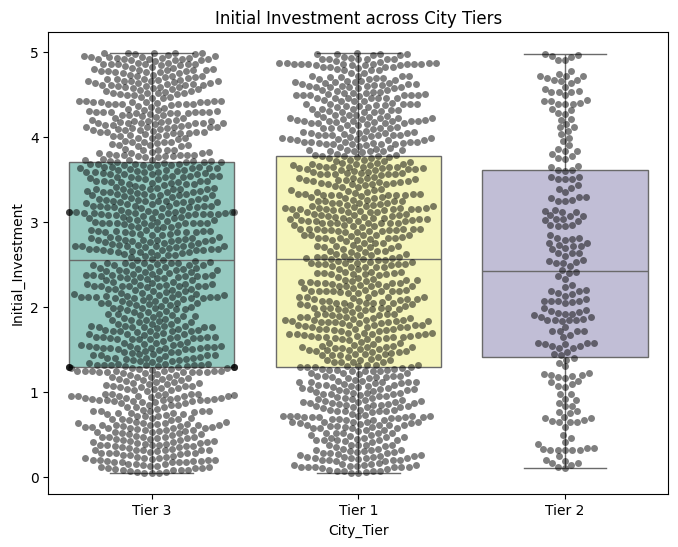

In [1115]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="City_Tier", y="Initial_Investment", palette="Set3")
sns.swarmplot(data=df, x="City_Tier", y="Initial_Investment", color="black", alpha=0.5)
plt.title("Initial Investment across City Tiers")
plt.show()


Startups across Tier 1, Tier 2, and Tier 3 cities receive almost similar initial investments. The spread is wide in all tiers, but the median investment is nearly the same, showing that city location doesn’t strongly affect starting funds.

C:\Users\GHANWAT\AppData\Local\Temp\ipykernel_5572\1007788832.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x="Burn_Rate", y="Survival_Duration_Years", jitter=True, palette="Set2")


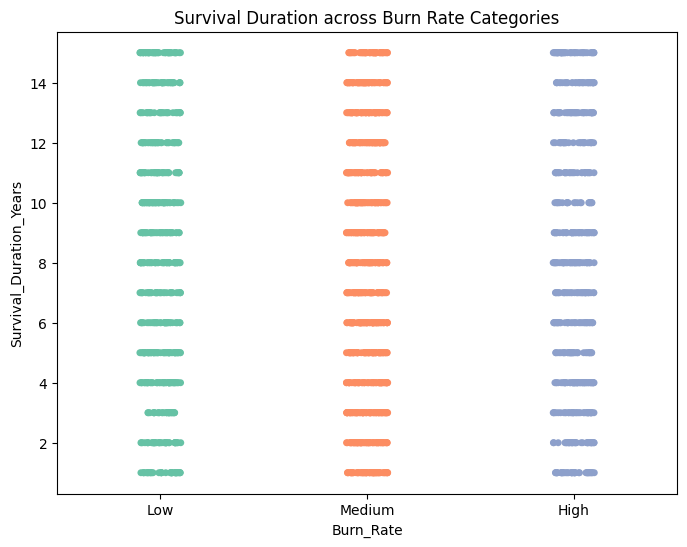

In [1117]:
plt.figure(figsize=(8,6))
sns.stripplot(data=df, x="Burn_Rate", y="Survival_Duration_Years", jitter=True, palette="Set2")
plt.title("Survival Duration across Burn Rate Categories")
plt.show()


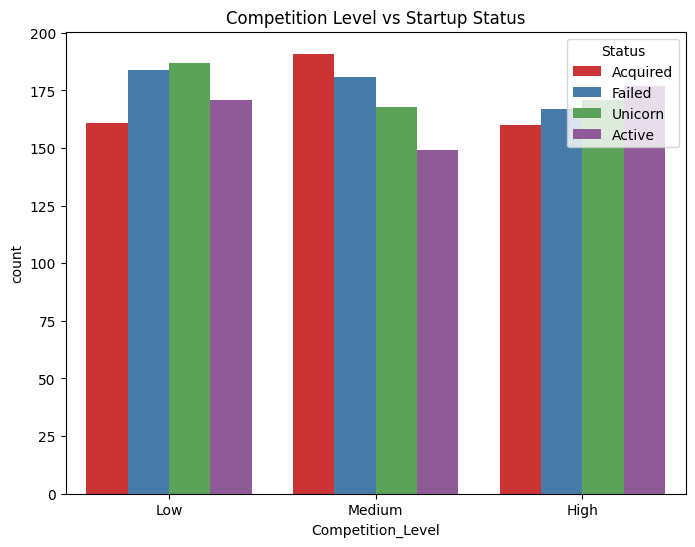

In [1119]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="Competition_Level", hue="Status", palette="Set1")
plt.title("Competition Level vs Startup Status")
plt.show()


When competition is low, more startups become unicorns or stay active.
In medium competition, many startups get acquired, but some also fail.
Under high competition, the numbers balance out, with startups spreading across all outcomes.

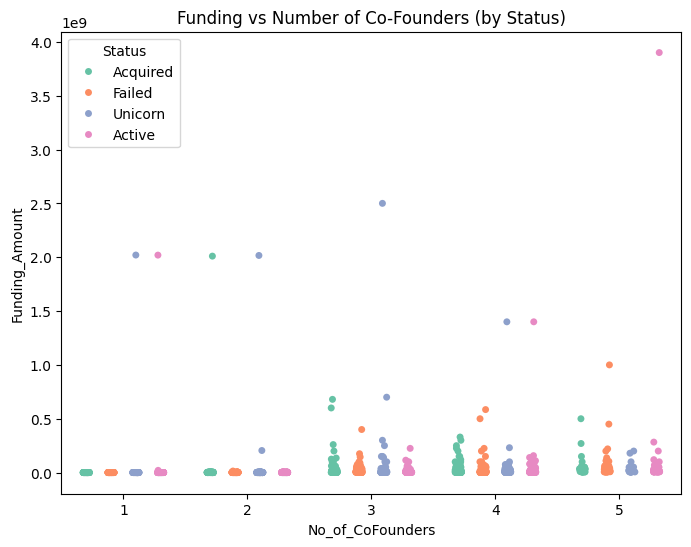

In [1121]:
plt.figure(figsize=(8,6))
sns.stripplot(data=df, x="No_of_CoFounders", y="Funding_Amount", hue="Status", dodge=True, jitter=True, palette="Set2")
plt.title("Funding vs Number of Co-Founders (by Status)")
plt.show()


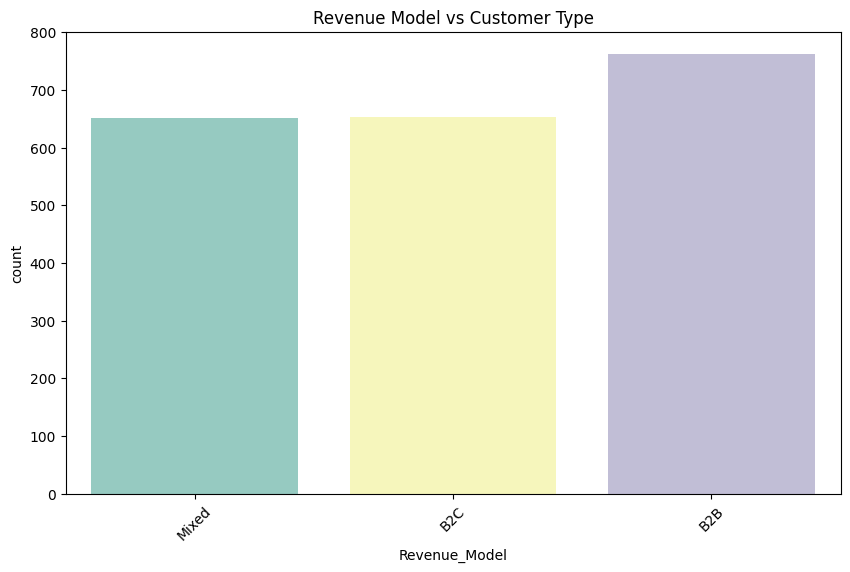

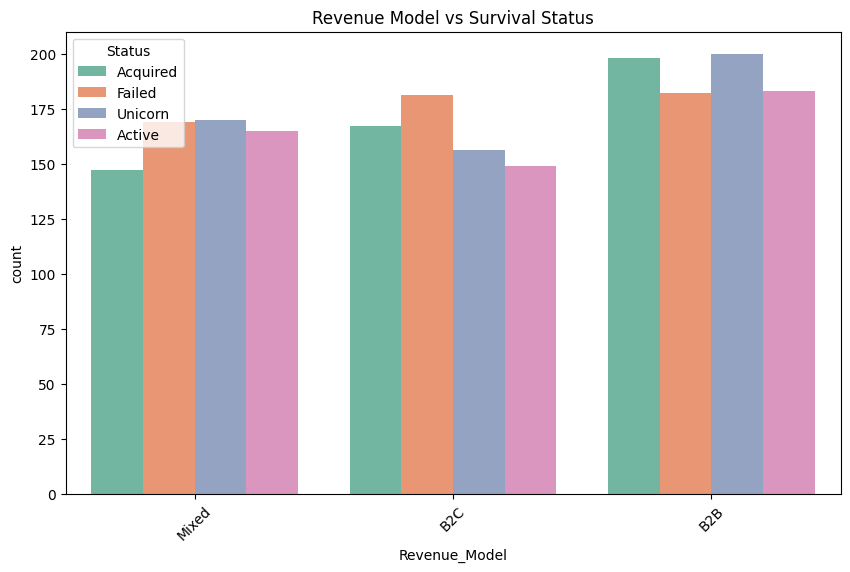

In [1123]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Revenue_Model", hue="Customer_Type", palette="Set3")
plt.title("Revenue Model vs Customer Type")
plt.xticks(rotation=45)
plt.show()

# Add survival breakdown
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Revenue_Model", hue="Status", palette="Set2")
plt.title("Revenue Model vs Survival Status")
plt.xticks(rotation=45)
plt.show()


Startups with a B2B revenue model are the most common, followed by Mixed and B2C models.
This shows that many startups prefer selling to businesses, as it may offer more stable revenue than directly targeting consumers.
Startups with a B2B revenue model show the strongest survival, with many becoming Acquired or Unicorns.
On the other hand, B2C startups have the highest failure count, while Mixed models sit in between.

C:\Users\GHANWAT\AppData\Local\Temp\ipykernel_5572\3852418141.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_t, x="Sector_Cleaned", order=order, palette="Set2", ax=ax)
C:\Users\GHANWAT\AppData\Local\Temp\ipykernel_5572\3852418141.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_t, x="Sector_Cleaned", order=order, palette="Set2", ax=ax)
C:\Users\GHANWAT\AppData\Local\Temp\ipykernel_5572\3852418141.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_t, x="Sector_Cleaned", order=order, palette="Set2", ax

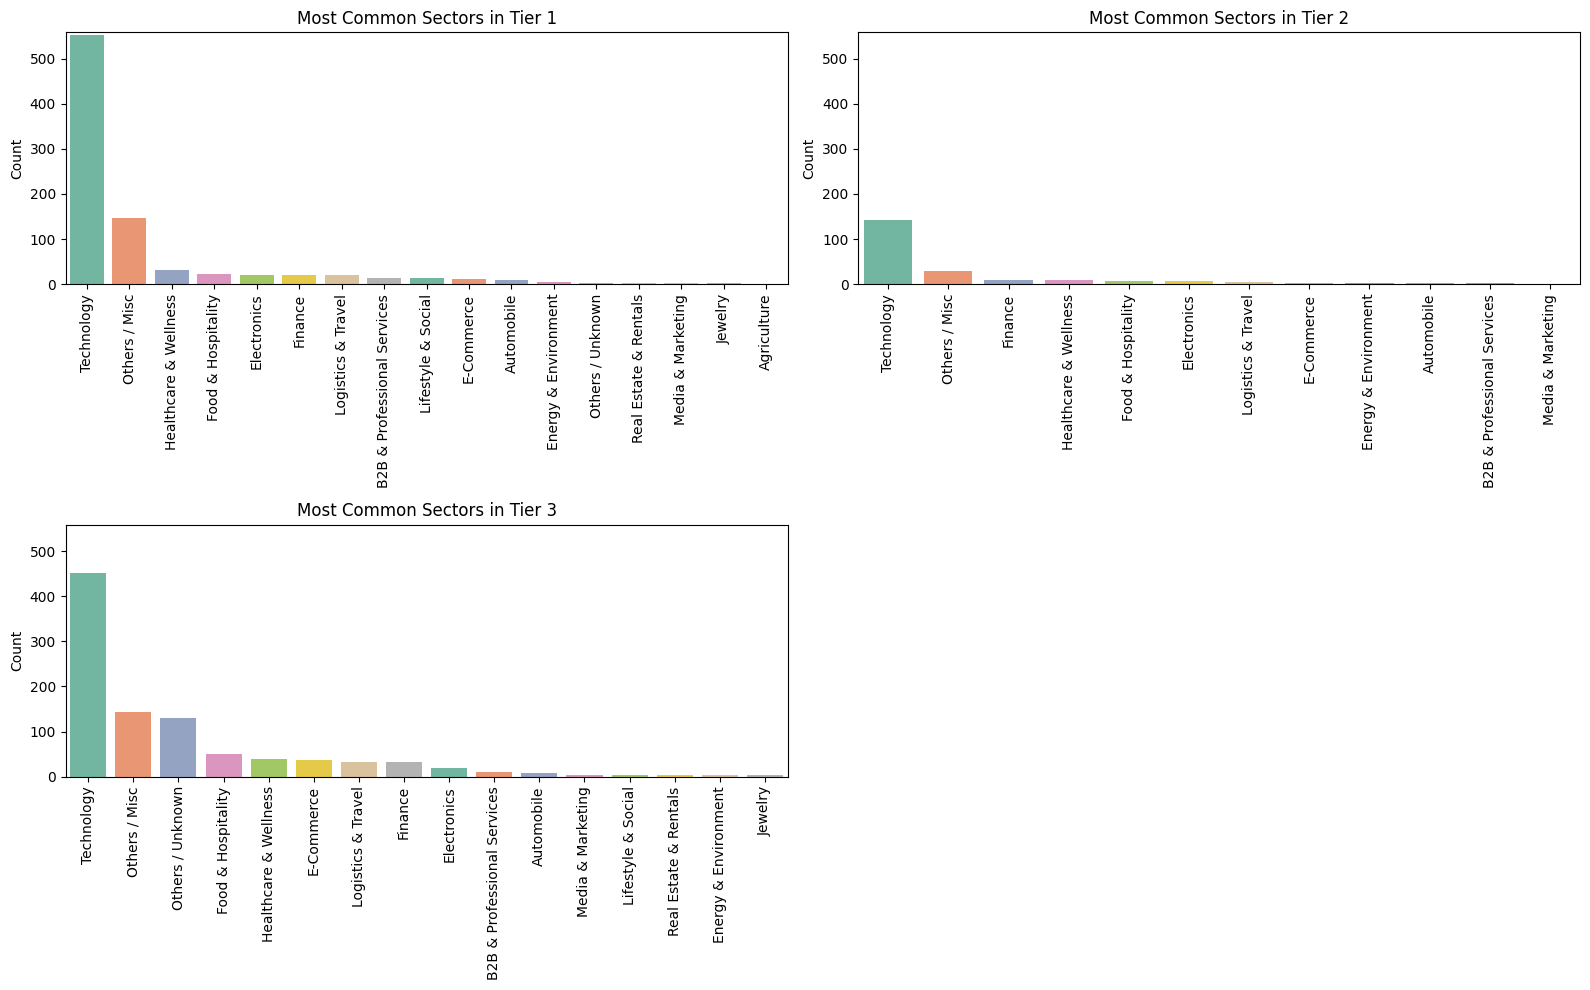


Top 5 sectors in Tier 1:
Sector_Cleaned
Technology               554
Others / Misc            147
Healthcare & Wellness     32
Food & Hospitality        23
Electronics               20

Top 5 sectors in Tier 2:
Sector_Cleaned
Technology               143
Others / Misc             30
Finance                   10
Healthcare & Wellness      8
Food & Hospitality         7

Top 5 sectors in Tier 3:
Sector_Cleaned
Technology               451
Others / Misc            144
Others / Unknown         130
Food & Hospitality        49
Healthcare & Wellness     40


In [1133]:
tiers = ["Tier 1", "Tier 2", "Tier 3"]

# prepare figure 2x2 (we'll use first 3 axes)
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

# compute a common y-limit for comparability
max_count = 0
for t in tiers:
    cnt = df[df["City_Tier"] == t]["Sector_Cleaned"].value_counts()
    if not cnt.empty:
        max_count = max(max_count, cnt.max())

# plot each tier
for i, tier in enumerate(tiers):
    ax = axes[i]
    df_t = df[df["City_Tier"] == tier]
    if df_t.empty:
        ax.text(0.5, 0.5, f"No data for {tier}", ha="center", va="center", fontsize=14)
        ax.set_xticks([])
        ax.set_yticks([])
        continue

    order = df_t["Sector_Cleaned"].value_counts().index
    sns.countplot(data=df_t, x="Sector_Cleaned", order=order, palette="Set2", ax=ax)
    ax.set_title(f"Most Common Sectors in {tier}")
    ax.set_xlabel("")
    ax.set_ylabel("Count")
    ax.tick_params(axis="x", rotation=90)
    # set same y-limit for fair comparison
    ax.set_ylim(0, max_count + 5)

# hide the unused subplot (bottom-right)
axes[3].axis("off")

plt.tight_layout()
plt.show()

# Print top 5 sectors per tier
for tier in tiers:
    print(f"\nTop 5 sectors in {tier}:")
    top5 = df[df["City_Tier"] == tier]["Sector_Cleaned"].value_counts().head(5)
    if top5.empty:
        print("  No data")
    else:
        print(top5.to_string())


Across all city tiers (1, 2, and 3), Technology clearly dominates as the most common startup sector.
In Tier 1 and Tier 3, there is more variety with Healthcare, Finance, and E-commerce also showing up, while Tier 2 is almost entirely focused on Technology.

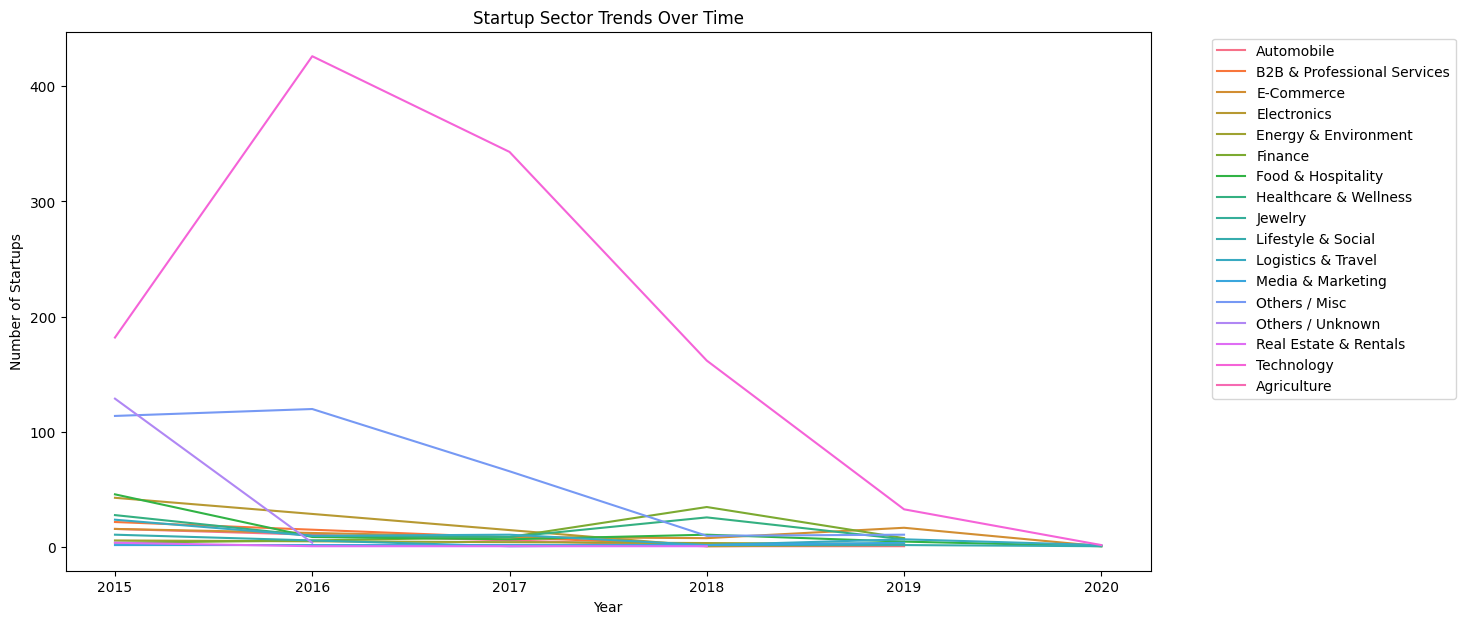

In [1137]:
# Convert Date column to datetime and extract Year
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Year"] = df["Date"].dt.year

# Count startups per sector per year
sector_year = df.groupby(["Year", "Sector_Cleaned"]).size().reset_index(name="Count")

# Plot trend for top sectors
plt.figure(figsize=(14,7))
sns.lineplot(data=sector_year, x="Year", y="Count", hue="Sector_Cleaned")
plt.title("Startup Sector Trends Over Time")
plt.ylabel("Number of Startups")
plt.xlabel("Year")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


Between 2015 and 2017, Technology startups saw a huge boom, peaking in 2016. But after that, their numbers kept declining sharply. Other sectors like Healthcare, Finance, and E-commerce stayed small and steady, never reaching the same scale.

In [1141]:
# Group by Sector + Gender_Mix + Status
gender_success = df.groupby(["Sector_Cleaned","Gender_Mix","Status"]).size().reset_index(name="Count")

# Pivot to get Active vs Failed counts for each sector + gender group
success_rate = (gender_success
                .pivot_table(index=["Sector_Cleaned","Gender_Mix"], 
                             columns="Status", 
                             values="Count", 
                             fill_value=0)
                .reset_index())

# Calculate totals and success rate
success_rate["Total"] = success_rate["Active"] + success_rate["Failed"]
success_rate["Success_Rate"] = success_rate["Active"] / success_rate["Total"]

# Show top 10 sectors where women (Female-led or Mixed) succeed most
print(success_rate[success_rate["Gender_Mix"].str.contains("Female", case=False)]
      .sort_values("Success_Rate", ascending=False)
      .head(10))


Status         Sector_Cleaned        Gender_Mix  Acquired  Active  Failed  \
11       Energy & Environment  Female-Dominated       1.0     1.0     0.0   
17         Food & Hospitality  Female-Dominated       1.0     2.0     1.0   
28         Logistics & Travel  Female-Dominated       1.0     2.0     1.0   
20      Healthcare & Wellness  Female-Dominated       0.0     3.0     2.0   
34              Others / Misc  Female-Dominated      10.0    10.0     7.0   
41                 Technology  Female-Dominated      27.0    30.0    32.0   
37           Others / Unknown  Female-Dominated       1.0     3.0     4.0   
5                  E-Commerce  Female-Dominated       1.0     2.0     3.0   
8                 Electronics  Female-Dominated       2.0     0.0     2.0   
14                    Finance  Female-Dominated       0.0     0.0     3.0   

Status  Unicorn  Total  Success_Rate  
11          0.0    1.0      1.000000  
17          3.0    3.0      0.666667  
28          2.0    3.0      0.66666

C:\Users\GHANWAT\AppData\Local\Temp\ipykernel_5572\4235769392.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_female_success,


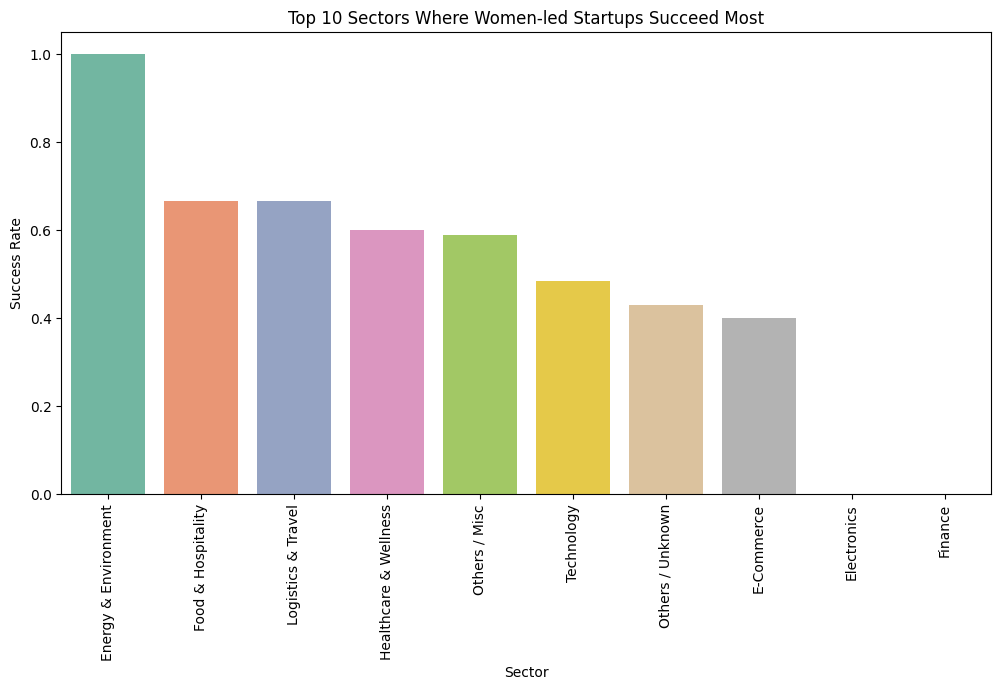

In [1145]:
# Filter only women-led or mixed-gender groups
female_success = success_rate[success_rate["Gender_Mix"].str.contains("Female", case=False)]

# Sort by success rate (top 10)
top_female_success = female_success.sort_values("Success_Rate", ascending=False).head(10)

# Barplot
plt.figure(figsize=(12,6))
sns.barplot(data=top_female_success,
            x="Sector_Cleaned", y="Success_Rate", palette="Set2")
plt.title("Top 10 Sectors Where Women-led Startups Succeed Most")
plt.xticks(rotation=90)
plt.ylabel("Success Rate")
plt.xlabel("Sector")
plt.show()


Women-led startups have made their mark across sectors, but their greatest success has been in Energy & Environment, where almost every idea turned into a win. They also did well in Food & Hospitality and Logistics & Travel, proving strong in service and care-driven industries. However, in fields like Technology and E-Commerce, the path was more challenging, with fewer startups finding success. This shows that women founders shine most where innovation blends with community, care, and sustainability.

# Conclusion

The Indian startup story is one of ambition and resilience. From Bengaluru to Tier-3 cities, innovation is spreading beyond metros. Technology leads the way, but healthcare, food, and green sectors are quickly rising. Founders come from all walks of life—graduates, professionals, dropouts—proving success has no fixed formula. While many startups struggle to survive beyond 10 years, each failure fuels the next wave of ideas. With growing inclusivity and policy support, India’s startup ecosystem is set to shape not just businesses, but society itself.